You need to work as a team for this project. Your job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Additional Note:</b> This note provides additional guideline for the project.

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

<b>Extra Credit</b> The group with the best prediction model is going to get extra points.

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final submited file should be very well structured and should have a consistent flow of analysis.</li>
    <li>You may want to use an additional word document to report the result of your analysis</li>
</ul>

# Step 1, 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
evaluation_dataset = pd.read_csv('movie_story_evaluation_file.csv')
movie_story_student_dataset = pd.read_csv('movie_story_student_file.csv')
movies_dataset = pd.read_csv('movies.csv')

In [3]:
movie_story_student_dataset.head()

movie_id                                              story
0    131072  A girl who always tends to fall in love with t...
1    196609  Bigfoot has come to the town of Ellwood City, ...
2    131074  At an altitude of 18,000 feet, Alaska\'s Mount...
3    196611  In her first special since 2003, Ellen revisit...
4    196613  Mike and Sulley are back at Monsters Universit...

In [4]:
movie_story_student_dataset.shape #20,000 movie stories

(20000, 2)

In [5]:
movie_story_student_dataset.movie_id.unique().shape

(20000,)

In [6]:
movie_story_student_dataset.story.unique().shape 
#can see there are same stories for movie - will check after combining with movies

(19968,)

In [7]:
movies_dataset.head()

movieId                       title                                  genres
0    27509             Carolina (2005)                          Comedy|Romance
1    27618  Sound of Thunder, A (2005)  Action|Adventure|Drama|Sci-Fi|Thriller
2    27788          Jacket, The (2005)           Drama|Mystery|Sci-Fi|Thriller
3    27821     Interpreter, The (2005)                          Drama|Thriller
4    27839        Ring Two, The (2005)           Drama|Horror|Mystery|Thriller

In [8]:
movies_dataset.shape #23,498 movies but has only 20,000 stories

(23498, 3)

In [9]:
movies_dataset.movieId.unique().shape

(23498,)

In [10]:
movies_dataset.title.unique().shape #seems title is unique but from found duplicate stories need to check

(23439,)

In [11]:
movie_story_dataset = pd.merge(movie_story_student_dataset,movies_dataset, left_on= 'movie_id', right_on = 'movieId')
movie_story_dataset.drop('movieId', inplace=True, axis = 1)
movie_story_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  
0                                 Comedy  
1                          Comedy|Horror  
2                            Documentary  
3                                 Comedy  
4      Animation|Children|Comedy|Fantasy  
...                                  ...  
19995               Action|Horror|Sci-Fi  
19996                      Drama|Romance  
19997                             Horror  
19998                        Documentary  
19999                     Comedy|Musical  

[20000 rows x 4 columns]

In [12]:
movie_story_dataset.story.unique().shape  #looks like all duplicates in this dataset after combining

(19968,)

In [13]:
(movie_story_dataset[movie_story_dataset.duplicated(['story'], keep=False)]).count()

movie_id    48
story       48
title       48
genres      48
dtype: int64

In [14]:
movie_story_dataset[movie_story_dataset.duplicated(['story'], keep=False)]

#close to 48 movie id have duplicates and no overview found is repeated multiple times

movie_id                                              story  \
50        65633  Fuel is the story of a young man\'s struggle t...   
285       66140  Recovering from a nail gun shot to the head an...   
1766     200646  Siblings headed to a family wedding endure a n...   
1928     201008  Siblings headed to a family wedding endure a n...   
2166     135923                                 No overview found.   
2262      70609                                 No overview found.   
2751     202599  A documentary about the Enron corporation, its...   
2972      72096                                 No overview found.   
3054     137809  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
3055     137813  Fuel is the story of a young man\'s struggle t...   
3102     203449  The Lonely Island spoofs Jose Canseco and Mark...   
3298     138338                                 No overview found.   
3757     139409                                 No overview found.   
4276     206117  The Lonely Island spoofs Jose Canseco and Mark...   
4801     207642  When his girlfriend is forced to marry another...   
5058     142861  In a hospital, ten soldiers are being treated ...   
6141     146836                                 No overview found.   
6245     147308  This story take place in Moscow during the 197...   
6590      83260                                 No overview found.   
6685     149144  Alien pods come to Earth and, naturally, start...   
6686     149146  Alien pods come to Earth and, naturally, start...   
6692      83654                                 No overview found.   
7041      85070  Recovering from a nail gun shot to the head an...   
7881     153861                                 No overview found.   
9431      93928  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
10358    162632  In a hospital, ten soldiers are being treated ...   
10552    163218                                 No overview found.   
10692    163585  An intimate journey through the formative year...   
10933     33154  A documentary about the Enron corporation, its...   
11155     99240                                 No overview found.   
11396     99820  The Kingdom of the People of the Earth once ru...   
11397     99822  The Kingdom of the People of the Earth once ru...   
12263    102158                                 No overview found.   
12270    102174  On the Arabian Peninsula in the 1930s, two war...   
14260    172837                                 No overview found.   
15282    175813  While holidaying in the French Alps, a Swedish...   
16198     47237  On the Arabian Peninsula in the 1930s, two war...   
16840    114342  While holidaying in the French Alps, a Swedish...   
17454    181617  The Victoria\'s Secret Fashion Show is an annu...   
17458    181623  The Victoria\'s Secret Fashion Show is an annu...   
17537    116401                                 No overview found.   
18087    183343  This story take place in Moscow during the 197...   
19346    186333  When his girlfriend is forced to marry another...   
19419    120913                                 No overview found.   
19689    121489                                 No overview found.   
19709    187075                                 No overview found.   
19727    187127  An intimate journey through the formative year...   
19805    187373                                 No overview found.   

                                                   title  \
50                                           Fuel (2008)   
285                                      Blackout (2007)   
1766     Into the Dark: I'm Just F*cking With You (2019)   
1928                    I'm Just F*cking with You (2019)   
2166           Horst Schlämmer - Isch kandidiere! (2009)   
2262                                Katze im Sack (2005)   
2751         Enron: The Smartest Guys in the Room (2005)   
2972                    Collector, The (Komornik) (2005)   
3054                                

In [15]:
(movie_story_dataset[movie_story_dataset['story'] == 'No overview found.']).count()

movie_id    18
story       18
title       18
genres      18
dtype: int64

In [16]:
(movie_story_dataset[movie_story_dataset['genres'] == '(no genres listed)']).count()

movie_id    1114
story       1114
title       1114
genres      1114
dtype: int64

In [17]:
movie_story_dataset[movie_story_dataset['story'] == 'No overview found.']          # 48-18 story dups

movie_id               story  \
2166     135923  No overview found.   
2262      70609  No overview found.   
2972      72096  No overview found.   
3298     138338  No overview found.   
3757     139409  No overview found.   
6141     146836  No overview found.   
6590      83260  No overview found.   
6692      83654  No overview found.   
7881     153861  No overview found.   
10552    163218  No overview found.   
11155     99240  No overview found.   
12263    102158  No overview found.   
14260    172837  No overview found.   
17537    116401  No overview found.   
19419    120913  No overview found.   
19689    121489  No overview found.   
19709    187075  No overview found.   
19805    187373  No overview found.   

                                            title                   genres  
2166    Horst Schlämmer - Isch kandidiere! (2009)                   Comedy  
2262                         Katze im Sack (2005)                    Drama  
2972             Collector, The (Komornik) (2005)                    Drama  
3298                 Lezioni di cioccolato (2007)                   Comedy  
3757                     Il cosmo sul comò (2008)                   Comedy  
6141                       Il nascondiglio (2007)  Horror|Mystery|Thriller  
6590                             Hardcover (2008)                   Comedy  
6692   Don't Think About It (Non Pensarci) (2007)             Comedy|Drama  
7881                     Dallas Pashamende (2005)                    Drama  
10552                        The Thirsting (2006)       (no genres listed)  
11155         Coluche, l'histoire d'un mec (2008)                    Drama  
12263     Three Degrees Colder (3° kälter) (2005)            Drama|Romance  
14260                       Michou d'Auber (2007)           Drama|Thriller  
17537                      Strawberry Wine (2009)                    Drama  
19419               Big, Large and Verdone (2008)                   Comedy  
19689                   Hotel Very Welcome (2007)             Comedy|Drama  
19709                              Cyprien (2009)                   Comedy  
19805                       Shattered Soul (2006)       (no genres listed)

In [18]:
movie_story_dataset[movie_story_dataset['genres'] == '(no genres listed)']

movie_id                                              story  \
17       196641  In the months following the terrorist attacks ...   
35       196675  A 30 years odyssey: the world\'s most intrigui...   
53       131172  A man, his dog, a young woman and a filmmaker ...   
108      196861  Russian Federation, December 31, 1999. After P...   
148      196959  I Am JFK Jr. - A Tribute to a Good Man is an h...   
...         ...                                                ...   
19865    187549  They\'re called water carriers, domestics, \'g...   
19926    187689  Filmed and recorded towards the tail end of \'...   
19928    187693  In the autumn of 2003 Iron Maiden performed th...   
19929    187697  When the \'Big Four,\' Metallica, Slayer, Mega...   
19933    187713  Inspired by one of the longest and bloodiest r...   

                                                   title              genres  
17                                Young and Alive (2018)  (no genres listed)  
35     Why Are We Creative? The Centipede's Dilemma (...  (no genres listed)  
53                                 Closed Curtain (2013)  (no genres listed)  
108                             Putin's Witnesses (2018)  (no genres listed)  
148                                  I Am JFK Jr. (2016)  (no genres listed)  
...                                                  ...                 ...  
19865         Wonderful Losers: A Different World (2017)  (no genres listed)  
19926               Iron Maiden: Live After Death (2008)  (no genres listed)  
19928              Iron Maiden: Death On The Road (2006)  (no genres listed)  
19929  Metallica/Slayer/Megadeth/Anthrax: The Big 4 -...  (no genres listed)  
19933                                         211 (2018)  (no genres listed)  

[1114 rows x 4 columns]

In [19]:
#remove null genres - no genres listed

movie_story_dataset.drop(movie_story_dataset[movie_story_dataset['genres'] == '(no genres listed)'].index,
                         inplace = True)

In [20]:
#remove null stories - No overview found

movie_story_dataset.drop(movie_story_dataset[movie_story_dataset['story'] == 'No overview found.'].index,
                         inplace = True)

In [21]:
movie_story_dataset.isnull().sum()

movie_id    0
story       0
title       0
genres      0
dtype: int64

In [22]:
movie_story_dataset[movie_story_dataset['genres'].str.match('.*Drama.*')== True] 

movie_id                                              story  \
11       196631  The tense marriage between two painters is sha...   
14       196637  Three estranged sisters deal with the death of...   
15        65567  After a plane crash, a young therapist, Claire...   
16       196639  How do we cope with the unthinkable? Tuva Novo...   
25       131122  Love Exposure explores the very roots of femal...   
...         ...                                                ...   
19986    187859  Dramatic comedy about having fun, throwing you...   
19988    122329  Waldemar Nods, a young man from Suriname, meet...   
19989    187865  The story of a busy man, who fills his time tr...   
19993    187869  Young Pooja lives with her mother in a village...   
19996    122337  When a bored-with-life English teacher meets a...   

                            title                       genres  
11     Red Is the Color of (2007)         Comedy|Drama|Romance  
14        The Breakup Girl (2015)                 Comedy|Drama  
15              Passengers (2008)       Drama|Mystery|Thriller  
16              Blind Spot (2018)                        Drama  
25           Love Exposure (2007)  Action|Comedy|Drama|Romance  
...                           ...                          ...  
19986      Nuotin vierestä (2016)                 Comedy|Drama  
19988            Sonny Boy (2011)            Drama|Romance|War  
19989               My Son (2017)               Drama|Thriller  
19993            White Sun (2016)              Adventure|Drama  
19996      Love N' Dancing (2009)                Drama|Romance  

[8403 rows x 4 columns]

In [23]:
movie_story_dataset['movie_id'].value_counts()

131072    1
105011    1
170605    1
170599    1
170595    1
         ..
149130    1
149122    1
83585     1
149120    1
56805     1
Name: movie_id, Length: 18870, dtype: int64

8403 drama movies in the dataset and the rest are non drama. So can notice the imbalance in the dataset even after dropping the missing data points.

In [24]:
#to save a version for analysis

#movie_story_dataset.to_csv('movie_story_dataset_v1.csv', index=False)

In [25]:
movie_story_dataset['genres'].value_counts()

Drama                                             3039
Documentary                                       2358
Comedy                                            1684
Comedy|Drama                                       890
Drama|Romance                                      606
                                                  ... 
Drama|Horror|Mystery|Sci-Fi                          1
Action|Comedy|Musical                                1
Action|Adventure|Comedy|Crime|Mystery|Thriller       1
Action|Adventure|Crime|IMAX                          1
Drama|Horror|Musical|Thriller                        1
Name: genres, Length: 979, dtype: int64

979 possible combinations of genres in the dataset for training.

Single genre of drama is the highest as seen above - 3039/18k

In [26]:
movie_story_dataset[movie_story_dataset['genres'] == 'Drama']

movie_id                                              story  \
16       196639  How do we cope with the unthinkable? Tuva Novo...   
36       131140  Frank and Simone have fulfilled a dream and li...   
40        65621  Liberty Kid is a 2007 low-budget American film...   
43       131160  Listening in to a conversation between his doc...   
49       131168  A disfigured concentration-camp survivor, unre...   
...         ...                                                ...   
19939    187725  In 1890, Catherine Weldon, a painter from New ...   
19940    187727  A sixty-something mother and her two adult son...   
19943    187741  A retired teacher who returns to Istanbul afte...   
19961     56719  Vitus tells the story of a highly-gifted boy (...   
19963    122268  Orphaned by smallpox, young Lancashire country...   

                                   title genres  
16                     Blind Spot (2018)  Drama  
36               Stopped on Track (2011)  Drama  
40                    Liberty Kid (2007)  Drama  
43     Oscar and the Lady in Pink (2009)  Drama  
49                        Phoenix (2014)  Drama  
...                                  ...    ...  
19939           Woman Walks Ahead (2018)  Drama  
19940             Love After Love (2018)  Drama  
19943                    Lovelorn (2005)  Drama  
19961                       Vitus (2006)  Drama  
19963                  Fanny Hill (2007)  Drama  

[3039 rows x 4 columns]

In [27]:
movie_story_dataset[movie_story_dataset['genres'] != 'Drama']

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  
0                                 Comedy  
1                          Comedy|Horror  
2                            Documentary  
3                                 Comedy  
4      Animation|Children|Comedy|Fantasy  
...                                  ...  
19995               Action|Horror|Sci-Fi  
19996                      Drama|Romance  
19997                             Horror  
19998                        Documentary  
19999                     Comedy|Musical  

[15831 rows x 4 columns]

In [28]:
#movie_story_dataset[movie_story_dataset['genres'].str.match('Drama.+')] #1975
movie_story_dataset[movie_story_dataset['genres'].str.match('.+Drama')]  #3389

movie_id                                              story  \
11       196631  The tense marriage between two painters is sha...   
14       196637  Three estranged sisters deal with the death of...   
25       131122  Love Exposure explores the very roots of femal...   
32        65596  Jacques Mesrine, a loyal son and dedicated sol...   
34       131138  Hitler no longer believes in himself, and can ...   
...         ...                                                ...   
19974    122304  Annie and Darren have been married for seven y...   
19979     56779  Forest fires burn in Sumatra; a smoke covers K...   
19984     56788  The true story of Texas congressman Charlie Wi...   
19986    187859  Dramatic comedy about having fun, throwing you...   
19993    187869  Young Pooja lives with her mother in a village...   

                                                   title  \
11                            Red Is the Color of (2007)   
14                               The Breakup Girl (2015)   
25                                  Love Exposure (2007)   
32     Mesrine: Killer Instinct (L'instinct de mort) ...   
34                                      My Führer (2007)   
...                                                  ...   
19974                                 The Freebie (2010)   
19979  I Don't Want to Sleep Alone (Hei yan quan) (2006)   
19984                        Charlie Wilson's War (2007)   
19986                             Nuotin vierestä (2016)   
19993                                   White Sun (2016)   

                            genres  
11            Comedy|Drama|Romance  
14                    Comedy|Drama  
25     Action|Comedy|Drama|Romance  
32     Action|Crime|Drama|Thriller  
34                Comedy|Drama|War  
...                            ...  
19974                 Comedy|Drama  
19979                 Comedy|Drama  
19984             Comedy|Drama|War  
19986                 Comedy|Drama  
19993              Adventure|Drama  

[3389 rows x 4 columns]

In [29]:
movie_story_dataset['DramaGenre'] = np.where(movie_story_dataset.genres.str.match('.*Drama.*'), 1, 0)

In [30]:
#movie_story_dataset.drop(['title','genres'],axis=1,inplace=True)

In [31]:
movie_story_dataset['DramaGenre'].value_counts()

0    10467
1     8403
Name: DramaGenre, dtype: int64

In [32]:
movie_story_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  
0                                 Comedy           0  
1                          Comedy|Horror           0  
2                            Documentary           0  
3                                 Comedy           0  
4      Animation|Children|Comedy|Fantasy           0  
...                                  ...         ...  
19995               Action|Horror|Sci-Fi           0  
19996                      Drama|Romance           1  
19997                             Horror           0  
19998                        Documentary           0  
19999                     Comedy|Musical           0  

[18870 rows x 5 columns]

In [33]:
movie_story_dataset[movie_story_dataset.duplicated(['story'], keep=False)]


movie_id                                              story  \
50        65633  Fuel is the story of a young man\'s struggle t...   
285       66140  Recovering from a nail gun shot to the head an...   
1766     200646  Siblings headed to a family wedding endure a n...   
1928     201008  Siblings headed to a family wedding endure a n...   
2751     202599  A documentary about the Enron corporation, its...   
3054     137809  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
3055     137813  Fuel is the story of a young man\'s struggle t...   
3102     203449  The Lonely Island spoofs Jose Canseco and Mark...   
4276     206117  The Lonely Island spoofs Jose Canseco and Mark...   
4801     207642  When his girlfriend is forced to marry another...   
5058     142861  In a hospital, ten soldiers are being treated ...   
6245     147308  This story take place in Moscow during the 197...   
6685     149144  Alien pods come to Earth and, naturally, start...   
6686     149146  Alien pods come to Earth and, naturally, start...   
7041      85070  Recovering from a nail gun shot to the head an...   
9431      93928  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
10358    162632  In a hospital, ten soldiers are being treated ...   
10933     33154  A documentary about the Enron corporation, its...   
11396     99820  The Kingdom of the People of the Earth once ru...   
11397     99822  The Kingdom of the People of the Earth once ru...   
12270    102174  On the Arabian Peninsula in the 1930s, two war...   
15282    175813  While holidaying in the French Alps, a Swedish...   
16198     47237  On the Arabian Peninsula in the 1930s, two war...   
16840    114342  While holidaying in the French Alps, a Swedish...   
18087    183343  This story take place in Moscow during the 197...   
19346    186333  When his girlfriend is forced to marry another...   

                                                   title  \
50                                           Fuel (2008)   
285                                      Blackout (2007)   
1766     Into the Dark: I'm Just F*cking With You (2019)   
1928                    I'm Just F*cking with You (2019)   
2751         Enron: The Smartest Guys in the Room (2005)   
3054                                        After (2009)   
3055                                         Fuel (2009)   
3102   The Lonely Island Presents: The Unauthorized B...   
4276   The Lonely Island Presents: The Unauthorized B...   
4801                                  Kabir Singh (2019)   
5058                        Cemetery of Splendour (2015)   
6245                              Vanished Empire (2008)   
6685                             Parasyte: Part 1 (2014)   
6686                             Parasyte: Part 2 (2015)   
7041                                     Blackout (2007)   
9431                                     After... (2006)   
10358                        Cemetery of Splendor (2015)   
10933        Enron: The Smartest Guys in the Room (2005)   
11396  Pokémon the Movie: Black - Victini and Reshira...   
11397  Pokémon the Movie: White - Victini and Zekrom ...   
12270                           Day of the Falcon (2011)   
15282                               Force Majeure (2014)   
16198                                  Black Gold (2006)   
16840                      Force Majeure (Turist) (2014)   
18087                                Love in USSR (2012)   
19346                                 Arjun Reddy (2017)   

                       genres  DramaGenre  
50                Documentary           0  
285           Horror|Thriller           0  
1766   Comedy|Horror|Thriller           0  
1928            Comedy|Horror           0  
2751              Documentary           0  
3054                    Drama           1  
3055        Documentary|Drama           1  
3102                   Comedy           0  
4276                   Comedy           0  
4801     Action|Drama|Romance           1  
5058       

In [34]:
movie_story_dataset[movie_story_dataset.duplicated(['story'], keep=False)]

movie_id                                              story  \
50        65633  Fuel is the story of a young man\'s struggle t...   
285       66140  Recovering from a nail gun shot to the head an...   
1766     200646  Siblings headed to a family wedding endure a n...   
1928     201008  Siblings headed to a family wedding endure a n...   
2751     202599  A documentary about the Enron corporation, its...   
3054     137809  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
3055     137813  Fuel is the story of a young man\'s struggle t...   
3102     203449  The Lonely Island spoofs Jose Canseco and Mark...   
4276     206117  The Lonely Island spoofs Jose Canseco and Mark...   
4801     207642  When his girlfriend is forced to marry another...   
5058     142861  In a hospital, ten soldiers are being treated ...   
6245     147308  This story take place in Moscow during the 197...   
6685     149144  Alien pods come to Earth and, naturally, start...   
6686     149146  Alien pods come to Earth and, naturally, start...   
7041      85070  Recovering from a nail gun shot to the head an...   
9431      93928  Manuel (Trist\xc3\xa1n Ulloa), Ana (Blanca Rom...   
10358    162632  In a hospital, ten soldiers are being treated ...   
10933     33154  A documentary about the Enron corporation, its...   
11396     99820  The Kingdom of the People of the Earth once ru...   
11397     99822  The Kingdom of the People of the Earth once ru...   
12270    102174  On the Arabian Peninsula in the 1930s, two war...   
15282    175813  While holidaying in the French Alps, a Swedish...   
16198     47237  On the Arabian Peninsula in the 1930s, two war...   
16840    114342  While holidaying in the French Alps, a Swedish...   
18087    183343  This story take place in Moscow during the 197...   
19346    186333  When his girlfriend is forced to marry another...   

                                                   title  \
50                                           Fuel (2008)   
285                                      Blackout (2007)   
1766     Into the Dark: I'm Just F*cking With You (2019)   
1928                    I'm Just F*cking with You (2019)   
2751         Enron: The Smartest Guys in the Room (2005)   
3054                                        After (2009)   
3055                                         Fuel (2009)   
3102   The Lonely Island Presents: The Unauthorized B...   
4276   The Lonely Island Presents: The Unauthorized B...   
4801                                  Kabir Singh (2019)   
5058                        Cemetery of Splendour (2015)   
6245                              Vanished Empire (2008)   
6685                             Parasyte: Part 1 (2014)   
6686                             Parasyte: Part 2 (2015)   
7041                                     Blackout (2007)   
9431                                     After... (2006)   
10358                        Cemetery of Splendor (2015)   
10933        Enron: The Smartest Guys in the Room (2005)   
11396  Pokémon the Movie: Black - Victini and Reshira...   
11397  Pokémon the Movie: White - Victini and Zekrom ...   
12270                           Day of the Falcon (2011)   
15282                               Force Majeure (2014)   
16198                                  Black Gold (2006)   
16840                      Force Majeure (Turist) (2014)   
18087                                Love in USSR (2012)   
19346                                 Arjun Reddy (2017)   

                       genres  DramaGenre  
50                Documentary           0  
285           Horror|Thriller           0  
1766   Comedy|Horror|Thriller           0  
1928            Comedy|Horror           0  
2751              Documentary           0  
3054                    Drama           1  
3055        Documentary|Drama           1  
3102                   Comedy           0  
4276                   Comedy           0  
4801     Action|Drama|Romance           1  
5058       

In [35]:
#movie_story_dataset[movie_story_dataset['movie_id'] == 65633]

movie_story_dataset.drop(movie_story_dataset[movie_story_dataset.movie_id.isin([65633, 66140, 85070, 201008, 202599, 93928, 206117, 207642,
                                                           162632, 183343, 149146, 99822, 47237, 114342])].index,
                         inplace=True)

In [36]:

movie_story_dataset[movie_story_dataset['movie_id'].isin([67363, 150876, 154331, 176155, 182973, 
                                                                                151431, 175919, 177209]) ]

movie_id                                              story  \
775       67363  Dziej\xc4\x85ce si\xc4\x99 wsp\xc3\xb3\xc5\x82...   
7115     150876  Zwariowana komedia pe\xc5\x82na absurd\xc3\xb3...   
7199     151431  A com\xc3\xa9dia conta a hist\xc3\xb3ria de He...   
8000     154331  \xce\x9c\xce\xb9\xce\xb1 \xcf\x80\xce\xb1\xcf\...   
15334    175919  Klasa II B jako zadanie domowe otrzymuje do na...   
15426    176155  \xd0\xa3 \xd0\xb4\xd0\xb5\xd0\xb2\xd1\x83\xd1\...   
15807    177209  Eski\xc5\x9fehir\xe2\x80\x99de bir \xc3\xbcniv...   
17912    182973  B\xc3\xbct\xc3\xbcn hayat\xc4\xb1n\xc4\xb1 bir...   

                                                   title            genres  \
775                                      Jasminum (2006)      Comedy|Drama   
7115            Job, czyli ostatnia szara komórka (2006)            Comedy   
7199   Melhores do Mundo - Hermanoteu na Terra de God...            Comedy   
8000                  Loafing and Camouflage: I-4 (2008)     Action|Comedy   
15334      Włatcy móch. Ćmoki, Czopki i Mondzioły (2009)  Animation|Comedy   
15426                                 Pro Lyuboff (2010)     Drama|Romance   
15807                                     Acı Aşk (2009)             Drama   
17912                                Güneşin Oğlu (2008)            Comedy   

       DramaGenre  
775             1  
7115            0  
7199            0  
8000            0  
15334           0  
15426           1  
15807           1  
17912           0

In [37]:
# Movies not English

#movie_story_dataset.drop(movie_story_dataset[movie_story_dataset.movie_id.isin([67363, 150876, 154331, 176155, 182973, 
#                                                                                151431, 175919, 177209])].index,
#                         inplace=True)

In [38]:
movie_story_dataset[movie_story_dataset.duplicated(['story'], keep=False)]

Empty DataFrame
Columns: [movie_id, story, title, genres, DramaGenre]
Index: []

In [39]:
movie_story_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  
0                                 Comedy           0  
1                          Comedy|Horror           0  
2                            Documentary           0  
3                                 Comedy           0  
4      Animation|Children|Comedy|Fantasy           0  
...                                  ...         ...  
19995               Action|Horror|Sci-Fi           0  
19996                      Drama|Romance           1  
19997                             Horror           0  
19998                        Documentary           0  
19999                     Comedy|Musical           0  

[18856 rows x 5 columns]

In [40]:
movie_story_dataset[movie_story_dataset.duplicated(['title'], keep=False)]

movie_id                                              story  \
386      197425  An Emergency Services Operator in a Fire Contr...   
769      132874  This harrowing tale of survival centers on Ros...   
826       67459  Emily and her friend Angelica go to a rave in ...   
1071     199035  Three friends on a wilderness excursion must o...   
1140     199219  When a 12-year-old boy goes missing, lead inve...   
...         ...                                                ...   
18159    183459  A girl and her friends find a game in the atti...   
18533    118818  A young 20-year-old-woman named Wing (Lan Wei)...   
19165    185925  Eric moves in with his father, a man he barely...   
19566    121223  The Cleary brothers, Sam, Leo and Douglas took...   
19723    121586  Carmen and Alfredo live a happy, quiet life in...   

                         title              genres  DramaGenre  
386            Operator (2015)               Drama           1  
769                Rose (2011)           Drama|War           1  
826               Chaos (2005)  Crime|Drama|Horror           1  
1071        Blood Money (2017)      Drama|Thriller           1  
1140          I See You (2019)            Thriller           0  
...                        ...                 ...         ...  
18159  The Midnight Man (2016)              Horror           0  
18533            Frozen (2010)     Fantasy|Romance           0  
19165       Good People (2014)               Drama           1  
19566       The Reunion (2011)        Action|Drama           1  
19723          Paradise (2013)             Romance           0  

[68 rows x 5 columns]

In [41]:
#duplicate_movies = movie_story_dataset[movie_story_dataset.duplicated(['title'], keep=False)]
#duplicate_movies.to_csv('duplicate_movies_v1.csv', index=False)

#### Test Data Analysis

In [42]:
#target

movie_evaluation_dataset = pd.merge(evaluation_dataset,movies_dataset, left_on= 'movie_id', right_on = 'movieId')
movie_evaluation_dataset.drop('movieId', inplace=True, axis = 1)
movie_evaluation_dataset


movie_id                                              story  \
0       122349  Growing up in the Mission district of San Fran...   
1       122351  A soldier returns home from the Iraq war only ...   
2       122361  Marco the Monkey works as a beach officer. But...   
3       187901  When an honest cop, Vijay Kumar\'s family is r...   
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...   
...        ...                                                ...   
3493    131062  In the middle of nowhere, 20 years after an ap...   
3494    131064  After living for years as a struggling artist ...   
3495    131066  Ronal is a young barbarian with low self-estee...   
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...   
3497    131070  During their childhood, Hanna and Clarissa wer...   

                                      title                       genres  
0                         La Mission (2009)                        Drama  
1     Stir of Echoes: The Homecoming (2007)              Horror|Thriller  
2          Primates of the Caribbean (2012)    Animation|Children|Comedy  
3                              Theri (2016)               Action|Romance  
4                            Kaththi (2014)         Action|Drama|Romance  
...                                     ...                          ...  
3493                  20 Years After (2008)         Drama|Fantasy|Sci-Fi  
3494       Growing Up and Other Lies (2014)                       Comedy  
3495             Ronal the Barbarian (2011)  Adventure|Animation|Fantasy  
3496               Sex Up Your Life! (2005)                       Comedy  
3497                       Forgotten (2012)       Drama|Mystery|Thriller  

[3498 rows x 4 columns]

In [43]:
movie_evaluation_dataset[movie_evaluation_dataset.duplicated(['story'], keep=False)]

movie_id                                              story  \
313    188769  Polish Legends about courage, strength, ambiti...   
316    188775  Polish Legends about courage, strength, ambiti...   

                                 title  genres  
313  Polish Legends: Twardowsky (2015)  Sci-Fi  
316  Polish Legends: The Dragon (2015)  Sci-Fi

In [44]:
movie_evaluation_dataset.drop(movie_evaluation_dataset[movie_evaluation_dataset['movie_id'] == 188775].index,
                              inplace = True)

In [45]:
movie_evaluation_dataset[movie_evaluation_dataset.duplicated(['title'], keep=False)]

movie_id                                              story  \
86      188207  A man and a woman meet in the ruins of post-wa...   
220     188541  After being infected in the wake of a violent ...   
321     188823  A man recently released from a mental institut...   
774     124456  In order to secure the position of Head of Ped...   
1438    191713  The community reels after an incident on a sub...   
1632    192157  Buenos Aires, Argentina, 1971. Carlos Robledo ...   
1734     61312  A man who is being driven crazy by the noise i...   
1743    192405  When a young couple gets the dreaded raccoon f...   
2172    193447  True story of Ashraf Marwan, who was President...   
2208    193559  \'Cargo\' brings the raw story of three brothe...   
2641    194652  A dying actor asks a doctor to help him commit...   
2712    194845  A group of young men dare a classmate to reach...   

                     title                     genres  
86         Cold War (2018)                      Drama  
220           Cargo (2017)               Drama|Horror  
321        Delirium (2018)            Horror|Thriller  
774   Simple Things (2007)             Children|Drama  
1438          Noise (2007)       Crime|Drama|Thriller  
1632      The Angel (2018)                Crime|Drama  
1734          Noise (2007)               Comedy|Drama  
1743       Cold War (2018)             Comedy|Romance  
2172      The Angel (2018)  Action|Drama|Thriller|War  
2208          Cargo (2017)                      Drama  
2641  Simple Things (2007)                      Drama  
2712       Delirium (2018)            Horror|Thriller

In [46]:
movie_evaluation_dataset[movie_evaluation_dataset.duplicated(['story'], keep=False)]

Empty DataFrame
Columns: [movie_id, story, title, genres]
Index: []

In [47]:
movie_evaluation_dataset[movie_evaluation_dataset['story'] == 'No overview found.']

Empty DataFrame
Columns: [movie_id, story, title, genres]
Index: []

In [48]:
movie_evaluation_dataset[movie_evaluation_dataset['genres'] == '(no genres listed)']

movie_id                                              story  \
37      188013  Following a brawl, Captain Ignat, who is traum...   
58      122573  18-year-old Hannah Yoder is ready to become an...   
87      188209  A scientist &amp; inventor in 1907, Dr Plonk, ...   
94      188225  A teenage boy\'s infatuation with a woman he s...   
146     188387  Mahanati depicts the life and career of one of...   
...        ...                                                ...   
3456    196511  Springsteen on Broadway is a solo acoustic per...   
3473    131021  Sunny is struggling to make a living in the Bo...   
3475    131029  Mara Lorbeer, a fifteen year old girl, finds o...   
3481    196583  Oma & Bella is an intimate glimpse into the wo...   
3489    196593  This film is an homage to the Gaza Strip and t...   

                                 title              genres  
37                   The Convoy (2012)  (no genres listed)  
58              Expecting Amish (2014)  (no genres listed)  
87                    Dr. Plonk (2007)  (no genres listed)  
94      All These Small Moments (2018)  (no genres listed)  
146                    Mahanati (2018)  (no genres listed)  
...                                ...                 ...  
3456    Springsteen On Broadway (2018)  (no genres listed)  
3473                 Filmistaan (2014)  (no genres listed)  
3475  Mara und der Feuerbringer (2015)  (no genres listed)  
3481                Oma & Bella (2012)  (no genres listed)  
3489                  Ouroboros (2017)  (no genres listed)  

[196 rows x 4 columns]

In [49]:
movie_evaluation_dataset.drop(movie_evaluation_dataset[movie_evaluation_dataset['genres'] == '(no genres listed)'].index,
                         inplace = True)

In [50]:
movie_evaluation_dataset[movie_evaluation_dataset.duplicated(['title'], keep=False)]

movie_id                                              story  \
86      188207  A man and a woman meet in the ruins of post-wa...   
220     188541  After being infected in the wake of a violent ...   
321     188823  A man recently released from a mental institut...   
774     124456  In order to secure the position of Head of Ped...   
1438    191713  The community reels after an incident on a sub...   
1632    192157  Buenos Aires, Argentina, 1971. Carlos Robledo ...   
1734     61312  A man who is being driven crazy by the noise i...   
1743    192405  When a young couple gets the dreaded raccoon f...   
2172    193447  True story of Ashraf Marwan, who was President...   
2208    193559  \'Cargo\' brings the raw story of three brothe...   
2641    194652  A dying actor asks a doctor to help him commit...   
2712    194845  A group of young men dare a classmate to reach...   

                     title                     genres  
86         Cold War (2018)                      Drama  
220           Cargo (2017)               Drama|Horror  
321        Delirium (2018)            Horror|Thriller  
774   Simple Things (2007)             Children|Drama  
1438          Noise (2007)       Crime|Drama|Thriller  
1632      The Angel (2018)                Crime|Drama  
1734          Noise (2007)               Comedy|Drama  
1743       Cold War (2018)             Comedy|Romance  
2172      The Angel (2018)  Action|Drama|Thriller|War  
2208          Cargo (2017)                      Drama  
2641  Simple Things (2007)                      Drama  
2712       Delirium (2018)            Horror|Thriller

In [51]:
movie_evaluation_dataset['DramaGenre'] = np.where(movie_evaluation_dataset.genres.str.match('.*Drama.*'), 1, 0)
movie_evaluation_dataset.drop(['title','genres'], axis = 1, inplace=True)
movie_evaluation_dataset

movie_id                                              story  DramaGenre
0       122349  Growing up in the Mission district of San Fran...           1
1       122351  A soldier returns home from the Iraq war only ...           0
2       122361  Marco the Monkey works as a beach officer. But...           0
3       187901  When an honest cop, Vijay Kumar\'s family is r...           0
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...           1
...        ...                                                ...         ...
3493    131062  In the middle of nowhere, 20 years after an ap...           1
3494    131064  After living for years as a struggling artist ...           0
3495    131066  Ronal is a young barbarian with low self-estee...           0
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...           0
3497    131070  During their childhood, Hanna and Clarissa wer...           1

[3301 rows x 3 columns]

In [52]:
movie_evaluation_dataset['DramaGenre'].value_counts()

0    1878
1    1423
Name: DramaGenre, dtype: int64

#### WordCloud Analysis

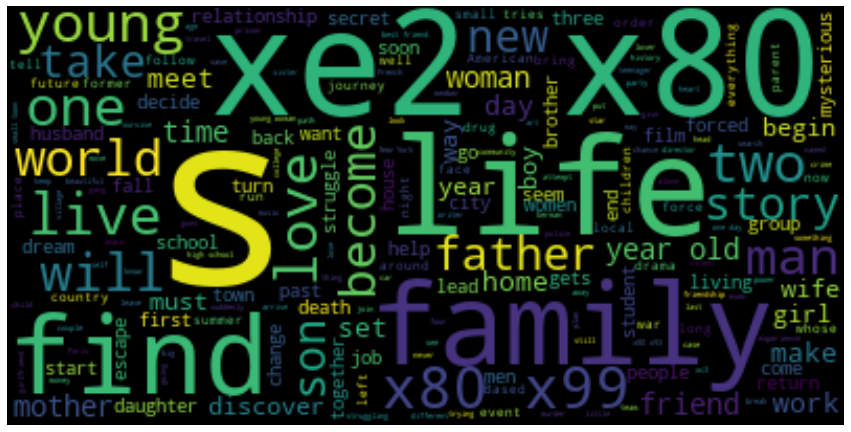

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Drama_movies_test = movie_evaluation_dataset[movie_evaluation_dataset['DramaGenre'] == 1]

story = " ".join(story for story in Drama_movies_test['story'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

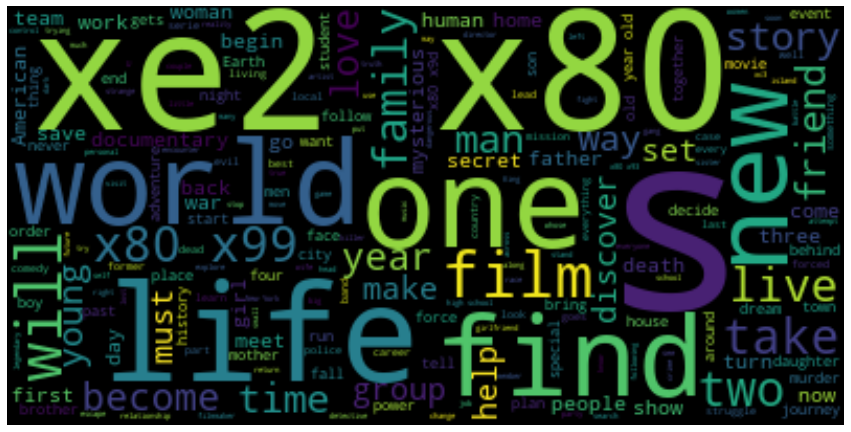

In [54]:
nonDrama_movies_test = movie_evaluation_dataset[movie_evaluation_dataset['DramaGenre'] != 1]

story = " ".join(story for story in nonDrama_movies_test['story'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

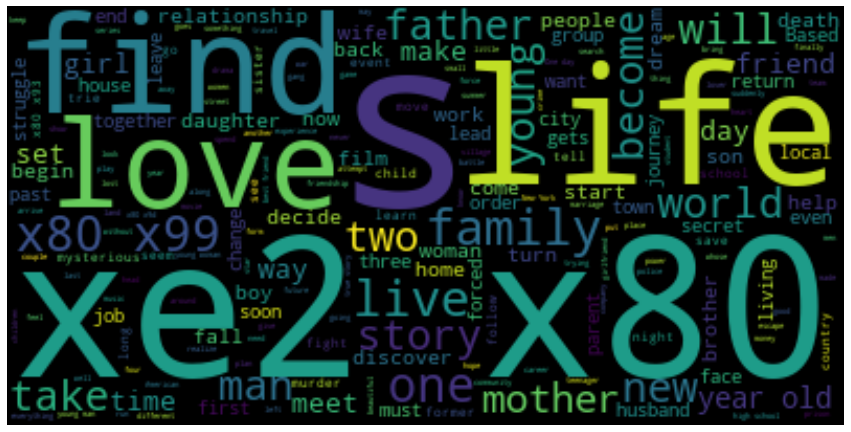

In [55]:
Drama_movies_train = movie_story_dataset[movie_story_dataset['DramaGenre'] == 1]

story = " ".join(story for story in Drama_movies_train['story'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

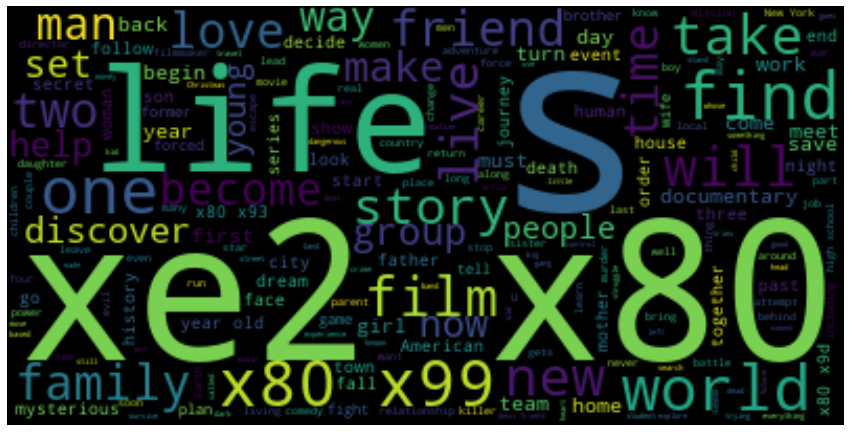

In [56]:
nonDrama_movies_train = movie_story_dataset[movie_story_dataset['DramaGenre'] != 1]

story = " ".join(story for story in nonDrama_movies_train['story'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [57]:
#(movie_story_dataset[movie_story_dataset['story'] == 'No overview found.']).drop(axis=0, inplace=True)

# Step 3, 4

#### Metrics during on model performance

Below are the metrics that are considered during model best selection

1. Since imbalanced - we try to maximize f1 score
2. Also, looking for high stable model (difference between in-sam and out-sam accuracies)
3. Classify as many as class of interest - Drama movies (Recall)
4. Non performance metric - Time taken to train and predict

In [58]:

# All packages for the notebook is collected into this cell

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
import matplotlib.pyplot as plt
from numpy import arange
from numpy import argmax
from sklearn.metrics import f1_score
import nltk

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.linear_model import SGDClassifier

import datetime

from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

# instantiate nltk's stemmer
porter = PorterStemmer()

# instantiate nltk's WordNet Lemmatizer 
Lemmatizer = WordNetLemmatizer()

## Round 1 - Count Vectorizer Part 1

1st round of countvectorizer: there is no removal stop words, no stemming, no lemmatication.
    
Only preprocessing is - removal of special chars (accented chars) - \xe2\x80\xc9 etc..

We plan to run few models - Multinomial NB, SGD, Logistic and SVM
NB is expected to be a good model for CountVectorizer (From professor notes)

MLP, Random Forest will not be used since MLP - scikit learn MLP is slow and RF will not be used since SGD would work too

In [59]:
def clean_text_v1(text):
    
    #convert text to lowercase 
    text = str(text).lower().replace('-', ' ')
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis

    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    #convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    #text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
    
    #lemmatization
    #text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [60]:
#apply above preprocess on story column
movie_story_dataset['CleanText_cv_part1'] = movie_story_dataset['story'].apply(clean_text_v1)

X = movie_story_dataset['CleanText_cv_part1']
y = movie_story_dataset['DramaGenre']

In [561]:
#Build pipeline to tune the CountVectorizer - will be using pipeline technique through out notebook for tuning CV and TFIDF
#Tuning is done on full(18k) training dataset and not just a part of training data

pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'cv__analyzer': ['word'],                   #'word', 'char', 'char_wb'
    #'cv__max_df': [0.5],
    'cv__min_df': [1e-05],                      #1e-04, 1e-05, 1e-06, 2e-05
    'cv__ngram_range': [ (1, 3)],               #(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 2), (2, 5), (2, 6)
    'cv__max_features': [20000],
    'nb__alpha': [1, 1.1, 0.9]
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

#https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

Best parameters set:
[('cv', CountVectorizer(max_features=20000, min_df=1e-05, ngram_range=(1, 3))), ('nb', MultinomialNB(alpha=0.9))]


In [562]:
print(grid_search_tune.best_score_)

0.6962242284230685


In [61]:
vect = CountVectorizer(ngram_range = (1, 3),
                       analyzer = 'word',
                       max_features = 20000,
                       min_df = 1e-05,
                       binary = True
                       #tokenizer = custom_tokenizer
                      )
vect.fit(X)
bag_of_words = vect.transform(X)

In [62]:
(vect.vocabulary_)

{'girl': 6423,
 'who': 19290,
 'always': 662,
 'to': 17395,
 'fall': 5347,
 'in': 8045,
 'love': 9991,
 'with': 19525,
 'the': 15556,
 'wrong': 19839,
 'guy': 6657,
 'meets': 10365,
 'one': 11881,
 'believes': 2258,
 'world': 19755,
 'is': 8703,
 'coming': 3465,
 'an': 706,
 'end': 4914,
 'next': 11004,
 'girl who': 6439,
 'to fall': 17596,
 'fall in': 5350,
 'in love': 8193,
 'love with': 10021,
 'with the': 19619,
 'the wrong': 16828,
 'one who': 11930,
 'who believes': 19299,
 'the world': 16802,
 'world is': 19775,
 'is coming': 8753,
 'coming to': 3470,
 'to an': 17409,
 'an end': 771,
 'to fall in': 17597,
 'fall in love': 5351,
 'in love with': 8197,
 'love with the': 10026,
 'the world is': 16813,
 'is coming to': 8754,
 'to an end': 17410,
 'bigfoot': 2334,
 'has': 6752,
 'come': 3404,
 'town': 18157,
 'of': 11225,
 'city': 3227,
 'and': 882,
 'causing': 3002,
 'big': 2330,
 'problems': 12813,
 'now': 11153,
 'it': 9034,
 'up': 18657,
 'three': 17282,
 'locals': 9878,
 'take':

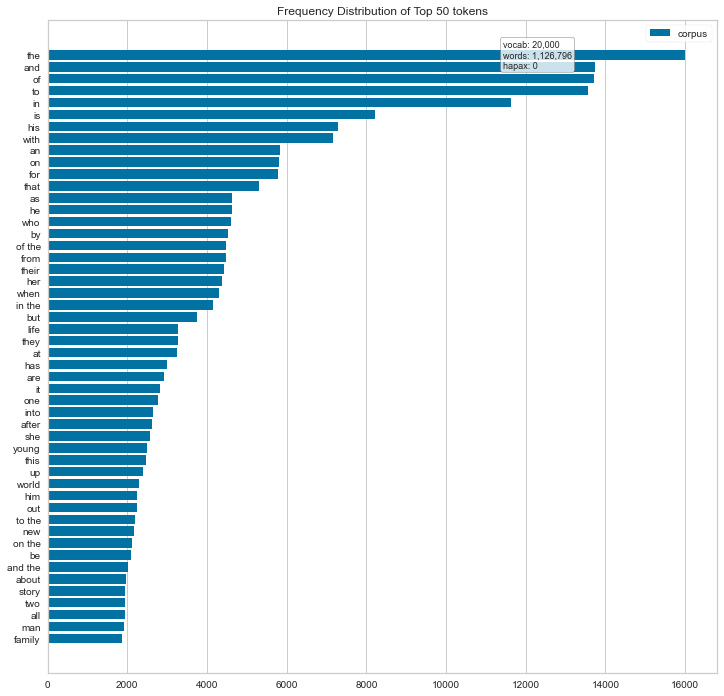

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [63]:
#View some of the most frequent words found by CountVectorizer after preprocess

from yellowbrick.text.freqdist import FreqDistVisualizer 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Get all features (tokens)
features = vect.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(12, 12))
visualizer = FreqDistVisualizer(features=features, n = 50)
visualizer.fit(bag_of_words)
visualizer.poof()

Can see stop words are dominant in the visualization so they would be removed in round 2 of countvectorizer

In [64]:
#Split data into train, val and test for hypertuning model params - same technique throughout the notebook

X_train_v1,X_val,y_train_v1,y_val = train_test_split(bag_of_words, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_test,y_train,y_test = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [65]:
X_train_v1.shape

(14142, 20000)

In [66]:
y_train_v1.value_counts()

0    7844
1    6298
Name: DramaGenre, dtype: int64

In [67]:
X_train.shape

(10606, 20000)

In [68]:
y_train.value_counts()

0    5883
1    4723
Name: DramaGenre, dtype: int64

In [69]:
X_val.shape

(4714, 20000)

In [70]:
y_val.value_counts()

0    2614
1    2100
Name: DramaGenre, dtype: int64

In [71]:
X_test.shape

(3536, 20000)

In [72]:
y_test.value_counts()

0    1961
1    1575
Name: DramaGenre, dtype: int64

### Naive Bayes

In [73]:
#hypertuning NB through 3 splits, grid search with focus on f1_micro - Since imbalanced all tuning is done on f1_micro
# through out the notebook f1 will be the criteria for hypertuning model params

start = datetime.datetime.now()

model_nb = MultinomialNB()

param_grid_LR = {'alpha': [1, 0.9, 2, 3, 4, 5]}        # Default 1


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_nb = GridSearchCV(model_nb, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_nb.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_nb = end-start

print("Best Parameter: {}".format(grid_nb.best_params_))
print("Best Cross Validation Score: {}".format(grid_nb.best_score_))

Best Parameter: {'alpha': 4}
Best Cross Validation Score: 0.6946080564746845


In [74]:
start = time.time()

model_NB_base = MultinomialNB(alpha = 4)

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = time.time()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

66.7900092506938

In [75]:
print(confusion_matrix(y_val, y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100) #in-sam
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)     #out-sam
print(recall_score(y_val,y_val_hat_NB_base) * 100)                         #recall
print(precision_score(y_val,y_val_hat_NB_base) * 100)                      #precision
print(f1_score(y_val,y_val_hat_NB_base) * 100)                             #f1

[[1834  780]
 [ 656 1444]]
80.36960211201207
69.53754773016546
68.76190476190476
64.92805755395683
66.7900092506938


On normal threshold - the perfomance is as above. But we need to check if better performances can be achieved by moving the threshold (cut-off for classification)

The threshold moving will also be focusing on maximizing the f1 score (imbalanced)

In [76]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.052, F-Score=0.69935


In [77]:

y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.052, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100) 

[[1411 1203]
 [ 324 1776]]
80.36960211201207
67.60712770470938
84.57142857142857
59.617321248741185
69.93502658003543


<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

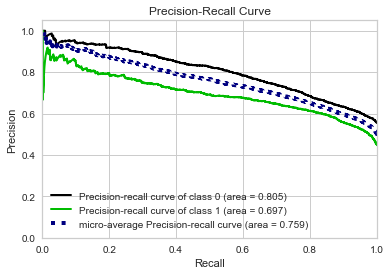

In [78]:
skplt.metrics.plot_precision_recall(y_val, pred_nb_base_prob)

### Logistic Regression

In [590]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000)


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
#param_grid_LR = {'solver': ['saga'],                                                  # attempt1 saga
#                    'C': [int(x) for x in range(1,20,5)]}                             # Default 1.0
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [0.001,0.002,0.003]}
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [1, 0.1, 0.001, 0.08, 0.09]}
param_grid_LR = {'solver': ['saga'],  
                   'C': [0.08],                                                         
                'tol': [1e-04, 1e-05, 1e-06],
#                'penalty': [ 'l2']
                }                                


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 0.08, 'solver': 'saga', 'tol': 1e-05}
Best Cross Validation Score: 0.6876301358319413


In [591]:
total_time_LR

datetime.timedelta(seconds=25, microseconds=963298)

In [79]:
start = datetime.datetime.now()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000,
                                  C = 0.08,
                                  tol = 1e-05,
                                  solver = 'saga')

model_LR_base.fit(X_train, y_train)
y_val_hat_LR_base = model_LR_base.predict(X_val)

end = datetime.datetime.now()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train)

f1_score(y_val,y_val_hat_LR_base) * 100 

66.049953746531

In [80]:
total_time_LR_base

datetime.timedelta(seconds=4, microseconds=935660)

In [81]:
print(confusion_matrix(y_val, y_val_hat_LR_base))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_base) * 100)
print(precision_score(y_val,y_val_hat_LR_base) * 100)
print(f1_score(y_val,y_val_hat_LR_base) * 100) 

[[1818  796]
 [ 672 1428]]
90.09051480294174
68.85871871022486
68.0
64.20863309352518
66.049953746531


In [82]:
pred_lr_base_prob = model_LR_base.predict_proba(X_val)

lr_base_prob_class1 = pred_lr_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.325, F-Score=0.68505


In [83]:
y_val_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.325, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100) 

[[1186 1428]
 [ 262 1838]]
90.09051480294174
64.14934238438693
87.52380952380953
56.276791181873854
68.50540439806187


### SGD Classifier

In [604]:
from sklearn.linear_model import SGDClassifier

start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter=100000)


#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}        # Default lbfgs
param_grid_sgd = {'loss': ['log'],                                                                # attempt1 newton-cg
                    'alpha': [0.003,0.0035,0.01, 0.001, 0.005, 0.009]}                                     # Default 1.0
param_grid_sgd = {'loss': ['log'],                                                                
                    'alpha': [0.005],
                     'epsilon': [0.1, 0.2, 1, 0.09]
                     #'n_iter_no_change': [5,6,7,4]
                 }                          # attemp2 - 31

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 0.005, 'epsilon': 0.1, 'loss': 'log'}
Best Cross Validation Score: 0.6868761213548633


In [84]:
start = time.time()

model_sgd_grid = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'log',
                             alpha = 0.005,
                             epsilon = 0.1)

model_sgd_grid.fit(X_train, y_train)
y_val_hat_sgd_grid = model_sgd_grid.predict(X_val)

end = time.time()
total_time_sgd_grid = end-start

y_train_hat_sgd_grid = model_sgd_grid.predict(X_train)

f1_score(y_val,y_val_hat_sgd_grid) * 100 

66.79955703211517

In [85]:
print(confusion_matrix(y_val, y_val_hat_sgd_grid))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_grid, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_grid) * 100)
print(precision_score(y_val,y_val_hat_sgd_grid) * 100)
print(f1_score(y_val,y_val_hat_sgd_grid) * 100) 

[[1707  907]
 [ 592 1508]]
80.9730341316236
68.2011030971574
71.80952380952381
62.44306418219462
66.79955703211517


In [86]:
pred_sgd_base_prob = model_sgd_grid.predict_proba(X_val)

sgd_base_prob_class1 = pred_sgd_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(sgd_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.399, F-Score=0.69289


In [87]:
y_val_hat_sgd_probs = np.where(sgd_base_prob_class1 >= 0.399, 1, 0)

print(confusion_matrix(y_val, y_val_hat_sgd_probs))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_probs) * 100)
print(precision_score(y_val,y_val_hat_sgd_probs) * 100)
print(f1_score(y_val,y_val_hat_sgd_probs) * 100)  #f1 65.88, 1753 rights

[[1192 1422]
 [ 233 1867]]
80.9730341316236
64.89181162494697
88.90476190476191
56.764974156278505
69.28929300426795


### SVM

In [611]:
start = time.time()

model_svm = SVC(random_state = 0, class_weight = 'balanced')

#param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}               # Default rbf
param_grid_svm = {'kernel': ['rbf'],                                             # attempt1 rbf
                    'C': [int(x) for x in range(1,6,2)]}                         # Default 1.0
#param_grid_svm = {'kernel': ['log'],                                            
#                    'C': [0.0001],
#                     'tol': [0.1,0.2,0.01,0.001,0.0001,1]}                     


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_svm = GridSearchCV(model_svm, param_grid_svm, cv = cv, scoring = 'f1_micro')
grid_svm.fit(X_train, y_train)

end = time.time()
total_time_svm = end-start

print("Best Parameter: {}".format(grid_svm.best_params_))
print("Best Cross Validation Score: {}".format(grid_svm.best_score_))

Best Parameter: {'C': 3, 'kernel': 'rbf'}
Best Cross Validation Score: 0.6864043789640761


In [88]:
start = time.time()

model_SVC_base = SVC(class_weight = 'balanced', random_state = 0, probability = True,
                    kernel= 'rbf',
                    C = 3)

model_SVC_base.fit(X_train, y_train)

y_val_hat_svc_base = model_SVC_base.predict(X_val)

end = time.time()
total_time_svc_base = end-start

y_train_hat_svc_base = model_SVC_base.predict(X_train)

f1_score(y_val,y_val_hat_svc_base) * 100 

63.41821743388834

In [89]:
print(confusion_matrix(y_val, y_val_hat_svc_base))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svc_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svc_base) * 100)
print(precision_score(y_val,y_val_hat_svc_base) * 100)
print(f1_score(y_val,y_val_hat_svc_base) * 100) 

[[1925  689]
 [ 805 1295]]
99.47199698283991
68.30717013152312
61.66666666666667
65.27217741935483
63.41821743388834


In [90]:
pred_svm_base_prob = model_SVC_base.predict_proba(X_val)

svm_base_prob_class1 = pred_svm_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(svm_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.324, F-Score=0.68648


In [91]:
y_val_hat_svm_probs = np.where(svm_base_prob_class1 >= 0.324, 1, 0)

print(confusion_matrix(y_val, y_val_hat_svm_probs))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svm_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svm_probs) * 100)
print(precision_score(y_val,y_val_hat_svm_probs) * 100)
print(f1_score(y_val,y_val_hat_svm_probs) * 100) 

[[1222 1392]
 [ 275 1825]]
99.47199698283991
64.63725074246925
86.90476190476191
56.72987255206714
68.64773368440851


#### Conclusions from Round 1 CountVectorizer Part 1

Best performing model of round 1 countvectorizer part 1 is: SGD classifier 

SGD has got stable model (difference between in-sam and out-sam accuracy) and high f1 score and class of interest - Drama(1) is at 88%
Cut off point - 0.399


## Round 1 - Count Vectorizer Part 2

Previously, there where no stop words removed so we now try removing them - Only change in this round

Rest of preproces is same.

Earlier round had quite a lot unstability in the models - will check if they can be reduced by removing just the stopwords

In [92]:
def clean_text_v2(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis

    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    #convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ]) #added change
    
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
    
    #lemmatization
    #text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [93]:
#apply above preprocess on story
movie_story_dataset['CleanText_cv_part2'] = movie_story_dataset['story'].apply(clean_text_v2)

X = movie_story_dataset['CleanText_cv_part2']
y = movie_story_dataset['DramaGenre']

In [94]:
#movie_story_dataset.to_csv('movie_story_dataset_try11.csv', index=False)

In [622]:
#use pipeline once again for tuning the countevectorizer with NB - since NB is pretty good base model for CV

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'cv__analyzer': ['word', 'char_wb'],                     # word, char_wb, char
    #'cv__max_df': [0.4],
    'cv__min_df': [1e-05, 1e-06, 2e-05],
    #'cv__ngram_range': [(1, 1), (1,2), (1,3), (1, 4), (1, 5),(1, 6), (2, 2), (2, 3), (2, 4)],
    'cv__ngram_range': [(1,2), (1, 3)],
    'cv__max_features': [15000, 20000, 10000, 5000]
    #'nb__alpha': [1, 1.1, 0.9]
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

#https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

Best parameters set:
[('cv', CountVectorizer(max_features=10000, min_df=1e-05, ngram_range=(1, 2))), ('nb', MultinomialNB())]


In [95]:
vect2 = CountVectorizer(ngram_range = (1,2),
                       analyzer = 'word',
                       #max_df = 0.4,
                        max_features = 10000,
                       min_df = 1e-05,
                        binary = True
                      )
vect2.fit(X)
bag_of_words2 = vect2.transform(X)

In [96]:
(vect2.vocabulary_)

{'girl': 3832,
 'always': 452,
 'fall': 3180,
 'love': 5271,
 'wrong': 9900,
 'guy': 4004,
 'meets': 5562,
 'one': 6246,
 'believes': 954,
 'world': 9832,
 'coming': 1750,
 'end': 2859,
 'next': 6080,
 'fall love': 3182,
 'bigfoot': 1002,
 'come': 1716,
 'town': 9041,
 'city': 1567,
 'causing': 1404,
 'big': 998,
 'problems': 6892,
 'three': 8908,
 'locals': 5201,
 'take': 8683,
 'campaign': 1299,
 'filmed': 3395,
 'la': 4929,
 'filmmaker': 3398,
 'hometown': 4274,
 'hero': 4178,
 'show': 7994,
 'assembled': 672,
 'colorful': 1706,
 'cast': 1377,
 'characters': 1472,
 'region': 7254,
 'bring': 1175,
 'vision': 9549,
 'life': 5083,
 'movie': 5825,
 'features': 3298,
 'pittsburgh': 6644,
 'famous': 3224,
 'best': 975,
 'loved': 5287,
 'celebrities': 1412,
 'like': 5131,
 'dad': 2114,
 'america': 467,
 'top': 9009,
 'model': 5737,
 'jim': 4770,
 'stand': 8319,
 'comic': 1746,
 'formerly': 3601,
 'morning': 5777,
 'mike': 5647,
 'even': 2998,
 'veteran': 9499,
 'news': 6078,
 'among': 479,

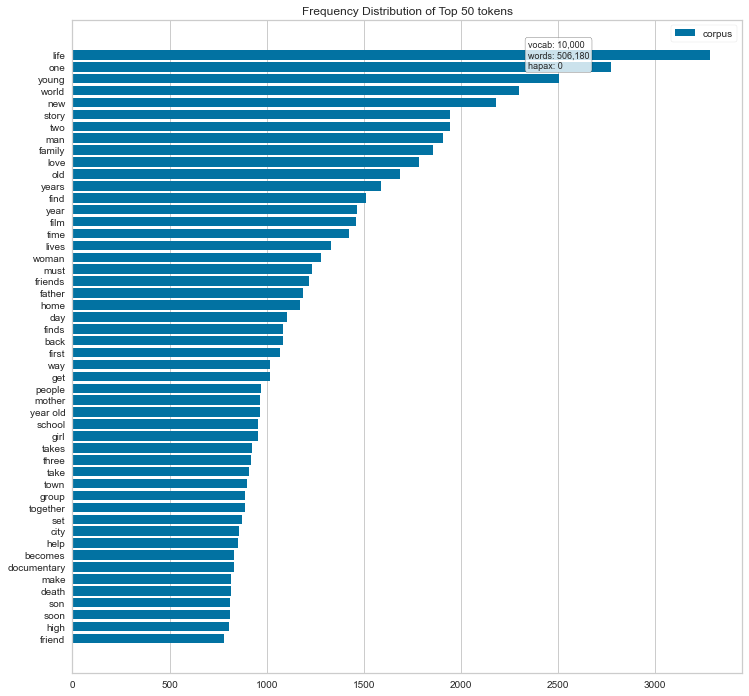

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [97]:
from yellowbrick.text.freqdist import FreqDistVisualizer 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Get all features (tokens)
features = vect2.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(12, 12))
visualizer = FreqDistVisualizer(features=features, n = 50)
visualizer.fit(bag_of_words2)
visualizer.poof()

Can see life, one, young from above - similar to the wordcloud seen during data analysis

In [98]:
X_train_v1,X_val,y_train_v1,y_val = train_test_split(bag_of_words2, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_test,y_train,y_test = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [99]:
X_train_v1.shape

(14142, 10000)

In [100]:
y_train_v1.value_counts()

0    7844
1    6298
Name: DramaGenre, dtype: int64

In [101]:
X_val.shape

(4714, 10000)

In [102]:
y_val.value_counts()

0    2614
1    2100
Name: DramaGenre, dtype: int64

In [103]:
X_test.shape

(3536, 10000)

In [104]:
y_test.value_counts()

0    1961
1    1575
Name: DramaGenre, dtype: int64

### Naive Bayes

In [105]:
start = time.time()

model_NB_base = MultinomialNB(alpha = 1)

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = time.time()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

68.18804198995892

In [106]:
print(confusion_matrix(y_val, y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_base) * 100)
print(precision_score(y_val,y_val_hat_NB_base) * 100)
print(f1_score(y_val,y_val_hat_NB_base) * 100)

[[1826  788]
 [ 606 1494]]
81.25589289081651
70.42851081883751
71.14285714285714
65.46888694127958
68.18804198995892


In [107]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.145, F-Score=0.70586


In [108]:
y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.145, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100)  #f1 65.88, 1753 rights

[[1434 1180]
 [ 311 1789]]
81.25589289081651
68.37081035214256
85.19047619047619
60.25597844392051
70.58591438153482


### Logistic Regression

In [110]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000)


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}       # Default lbfgs
#param_grid_LR = {'solver': ['sag'],                                                   # attempt1 sag
#                    'C': [int(x) for x in range(1,35,8)]}                             # Default 1.0
#param_grid_LR = {'solver': ['sag'],  
#                    'C': [1, 0.1, 0.15, 0.09]}
param_grid_LR = {'solver': ['sag'],  
                    'C': [0.1],                                                      # attempt3 - 27
                'tol': [0.0001, 0.0002, 0.001, 0.00009]}                                      # default l2

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 0.1, 'solver': 'sag', 'tol': 0.001}
Best Cross Validation Score: 0.6958333333333333


In [111]:
total_time_LR

datetime.timedelta(seconds=1, microseconds=524313)

In [112]:
start = datetime.datetime.now()

model_LR_r2 = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000,
                                  C = 0.1,
                                  tol = 0.0001,
                                  solver = 'sag')

model_LR_r2.fit(X_train, y_train)
y_val_hat_LR_r2 = model_LR_r2.predict(X_val)

end = datetime.datetime.now()
total_time_LR_r2 = end-start

y_train_hat_LR_r2 = model_LR_r2.predict(X_train)

f1_score(y_val,y_val_hat_LR_r2) * 100 

67.27814721394175

In [113]:
total_time_LR_r2

datetime.timedelta(microseconds=305815)

In [114]:
print(confusion_matrix(y_val, y_val_hat_LR_r2))
print(accuracy_score(y_train,y_train_hat_LR_r2, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_r2, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_r2) * 100)
print(precision_score(y_val,y_val_hat_LR_r2) * 100)
print(f1_score(y_val,y_val_hat_LR_r2) * 100) 

[[1820  794]
 [ 633 1467]]
85.77220441259664
69.72846839202376
69.85714285714286
64.8827952233525
67.27814721394175


In [115]:
pred_lr_r2_prob = model_LR_r2.predict_proba(X_val)

lr_r2_prob_class1 = pred_lr_r2_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_r2_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.376, F-Score=0.69540


In [116]:
y_val_hat_lr_probs = np.where(lr_r2_prob_class1 >= 0.376, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_r2, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100) 

[[1339 1275]
 [ 301 1799]]
85.77220441259664
66.56767076792532
85.66666666666667
58.52309694209499
69.5400077309625


### SGD Classifier

In [654]:
from sklearn.linear_model import SGDClassifier

start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter=100000)


#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}        # Default lbfgs
#param_grid_sgd = {'loss': ['log'],                                             # attempt1 newton-cg
#                    'alpha': [0.001,0.002,0.003, 0.01]}                             # Default 1.0
param_grid_sgd = {'loss': ['log'],                                             # attempt1 newton-cg
                    'alpha': [0.002],
                     'epsilon': [0.1, 0.2, 1, 0.09]
                     #'n_iter_no_change': [5,6,7,4]
                 }                          # attemp2 - 31


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 0.002, 'epsilon': 0.1, 'loss': 'log'}
Best Cross Validation Score: 0.6963045690477258


In [117]:
start = datetime.datetime.now()

model_sgd_grid = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'log',
                             alpha = 0.002,
                              epsilon = 0.1)

model_sgd_grid.fit(X_train, y_train)
y_val_hat_sgd_grid = model_sgd_grid.predict(X_val)

end = datetime.datetime.now()
total_time_sgd_grid = end-start

y_train_hat_sgd_grid = model_sgd_grid.predict(X_train)

f1_score(y_val,y_val_hat_sgd_grid) * 100 

67.48077792853911

In [118]:
print(confusion_matrix(y_val, y_val_hat_sgd_grid))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_grid, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_grid) * 100)
print(precision_score(y_val,y_val_hat_sgd_grid) * 100)
print(f1_score(y_val,y_val_hat_sgd_grid) * 100)

[[1784  830]
 [ 608 1492]]
81.92532528757307
69.49512091641917
71.04761904761905
64.25495262704565
67.48077792853911


In [119]:
pred_sgd_base_prob = model_sgd_grid.predict_proba(X_val)

sgd_base_prob_class1 = pred_sgd_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(sgd_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.401, F-Score=0.69782


In [120]:
y_val_hat_sgd_probs = np.where(sgd_base_prob_class1 >= 0.401, 1, 0)

print(confusion_matrix(y_val, y_val_hat_sgd_probs))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_probs) * 100)
print(precision_score(y_val,y_val_hat_sgd_probs) * 100)
print(f1_score(y_val,y_val_hat_sgd_probs) * 100)

[[1314 1300]
 [ 278 1822]]
81.92532528757307
66.52524395417903
86.76190476190476
58.36002562459962
69.78169283799312


### SVM

In [664]:
start = datetime.datetime.now()

model_svm = SVC(random_state = 0, class_weight = 'balanced')


#param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}                # Default rbf
#param_grid_svm = {'kernel': ['rbf'],                                             # attempt1 rbf
#                    'C': [int(x) for x in range(1,6,2)]}                         # Default 1.0
param_grid_svm = {'kernel': ['rbf'],                                            
                    'C': [0.9, 0.1, 0.2, 1, 2],
                     #'epsilon': [0.1,0.2,0.01,0.001,0.0001,1]
}                          


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_svm = GridSearchCV(model_svm, param_grid_svm, cv = cv, scoring = 'f1_micro')
grid_svm.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_svm = end-start

print("Best Parameter: {}".format(grid_svm.best_params_))
print("Best Cross Validation Score: {}".format(grid_svm.best_score_))

Best Parameter: {'C': 1, 'kernel': 'rbf'}
Best Cross Validation Score: 0.691967685779567


In [665]:
total_time_svm

343.2903804779053

In [121]:
start = datetime.datetime.now()

model_SVC_base = SVC( class_weight = 'balanced', random_state = 0, probability = True,
                    kernel = 'rbf',
                    C = 1)
model_SVC_base.fit(X_train, y_train)

y_val_hat_svc_base = model_SVC_base.predict(X_val)

end = datetime.datetime.now()
total_time_svc_base = end-start

y_train_hat_svc_base = model_SVC_base.predict(X_train)

f1_score(y_val,y_val_hat_svc_base) * 100 

65.6800563777308

In [122]:
total_time_svc_base

datetime.timedelta(seconds=198, microseconds=973473)

In [123]:
print(confusion_matrix(y_val, y_val_hat_svc_base))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svc_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svc_base) * 100)
print(precision_score(y_val,y_val_hat_svc_base) * 100)
print(f1_score(y_val,y_val_hat_svc_base) * 100)  #f1 65.88, 1753 rights

[[1855  759]
 [ 702 1398]]
94.44653969451254
69.00721255833687
66.57142857142857
64.81223922114047
65.6800563777308


In [124]:
pred_svm_base_prob = model_SVC_base.predict_proba(X_val)

svm_base_prob_class1 = pred_svm_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(svm_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.338, F-Score=0.69562


In [125]:
y_val_hat_svm_probs = np.where(svm_base_prob_class1 >= 0.338, 1, 0)

print(confusion_matrix(y_val, y_val_hat_svm_probs))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svm_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svm_probs) * 100)
print(precision_score(y_val,y_val_hat_svm_probs) * 100)
print(f1_score(y_val,y_val_hat_svm_probs) * 100)  #f1 65.88, 1753 rights

[[1350 1264]
 [ 306 1794]]
94.44653969451254
66.69495120916419
85.42857142857143
58.665794637017655
69.56184567661884


#### Conclusions from CountVectorizer Part 2 after removing stop words:

All models are much more stable and best model of this round is multinomial NB - Expected to run the best since it works well with countvectorizer - cutoff at 0.145 - f1 score is max - 70%

From now on we continue to remove stop words for TFIDF as well in both rounds

#### Conclusion from complete CounteVectorizer

Multinomial NB from round 2 of Count Vectorizer is the best model
- Max f1 score, highest stable, and good classification of class of interest - 1 (Drama movies)

## Round 2 - TFIDF Part 1

We do preprocessing steps as below:

1. Remove special characters using regular expressions and replace by nothing
2. Remove all non alphanumeric chars using regular expressions and replace by nothing
3. Remove stopwords
4. Stemming
5. Lematization

Round 1 of TF-IDF we only tune 'analyzer' and 'ngrams'. 
We Tune TF-IDF further in only round 2.

Below is an example for the special chars we find and we try to handle through regular expressions

In [126]:
movie_story_dataset['story'].iloc[4]

'Mike and Sulley are back at Monsters University for a fun-filled weekend with their Oozma Kappa fraternity brothers. The gang is throwing their first party, but no one\\xe2\\x80\\x99s showing up. Luckily for them, Mike and Sulley have come up with a plan to make sure \\xe2\\x80\\x9cParty Central\\xe2\\x80\\x9d is the most epic party the school has ever seen.'

In [127]:
def clean_text_v3(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis

    text = re.sub("[^a-zA-Z0-9 ]","",text)
    
    #convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    
    #stemming
    text = ' '.join([porter.stem(word) for word in text.split()])
    
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [128]:
#aply above preprocess on story for modelling

movie_story_dataset['CleanText_tfidf1'] = movie_story_dataset['story'].apply(clean_text_v3)


Can see below after preprocessing for above mentioned same datapoint.

In [129]:
movie_story_dataset['CleanText_tfidf1'].iloc[4]

'mike sulley back monster univers funfil weekend oozma kappa fratern brother gang throw first parti one show luckili mike sulley come plan make sure parti central epic parti school ever seen'

In [130]:
movie_story_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  \
0                                 Comedy           0   
1                          Comedy|Horror           0   
2                            Documentary           0   
3                                 Comedy           0   
4      Animation|Children|Comedy|Fantasy           0   
...                                  ...         ...   
19995               Action|Horror|Sci-Fi           0   
19996                      Drama|Romance           1   
19997                             Horror           0   
19998                        Documentary           0   
19999                     Comedy|Musical           0   

                                      CleanText_cv_part1  \
0      a girl who always tends to fall in love with t...   
1      bigfoot has come to the town of ellwood city  ...   
2      at an altitude of 18 000 feet  alaska  s mount...   
3      in her first special since 2003  ellen revisit...   
4      mike and sulley are back at monsters universit...   
...                                                  ...   
19995  the iconic creatures from two of the scariest ...   
19996  when a bored with life english teacher meets a...   
19997  herbert blount is a crowdfunding contributor f...   
19998  real boy is the coming of age story of bennett...   
19999  following a childhood tragedy  dewey cox follo...   

                                      CleanText_cv_part2  \
0      girl always tends fall love wrong guy meets on...   
1      bigfoot come town ellwood city pa causing big ...   
2      altitude 18 000 feet alaska mount st elias des...   
3      first special since 2003 ellen revisits road s...   
4      mike sulley back monsters university fun fille...   
...                                                  ...   
19995  iconic creatures two scariest film franchises ...   
19996  bored life english teacher meets west coast sw...   
19997  herbert blount crowdfunding contributor new ad...   
19998  real boy coming age story bennett wallace tran...   
19999  following childhood tragedy dewey cox follows ...   

                                        CleanText_tfidf1  
0      girl alway tend fall love wrong guy meet one b...  
1      bigfoot come town ellwood citi pa caus big pro...  
2      altitud 18000 foot alaska mount st elia destin...  
3      first special sinc 2003 ellen revisit road sta...  
4      mike sulley back monster univers funfil weeken...  
...                                                  ...  
1

In [131]:
#movie_story_dataset.to_csv('movie_story_dataset_v1.csv', index=False)

In [132]:
X = movie_story_dataset['CleanText_tfidf1']
y = movie_story_dataset['DramaGenre']

In [133]:
X.head()

0    girl alway tend fall love wrong guy meet one b...
1    bigfoot come town ellwood citi pa caus big pro...
2    altitud 18000 foot alaska mount st elia destin...
3    first special sinc 2003 ellen revisit road sta...
4    mike sulley back monster univers funfil weeken...
Name: CleanText_tfidf1, dtype: object

### Tune TFID vectorizer

We work on tuning the TF-IDF with minmal parameters - Analyzer and ngram only for this round using pipeline technique

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'tfidf__analyzer': ['word','char','char_wb'],
    #'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 3), (1, 4), (2, 3), (1, 5), (1, 6), (2, 4), (2,5), (1, 1), (1, 2), (2, 2)],
    'nb__alpha': (1, 0.1, 1.1)
}
grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

#https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

In [134]:
custom_vec_v1 = TfidfVectorizer(analyzer='char_wb',
                                #strip_accents = 'ascii',
                                #stop_words = 'english',
                                #max_df = .20,
                                #min_df= .0005,
                                #use_idf = True,
                                #smooth_idf = False,
                                #sublinear_tf = True,
                                #tokenizer = lambda x: x.split(' '),
                                ngram_range=(1, 5))

X_vectorized_v1 = custom_vec_v1.fit_transform(X)
X_vectorized_v1.shape

(18856, 149913)

In [135]:
min(custom_vec_v1.idf_)

1.0

We try visualizing the frquency distribution of the characters as below to make sense of the results of TF-IDF

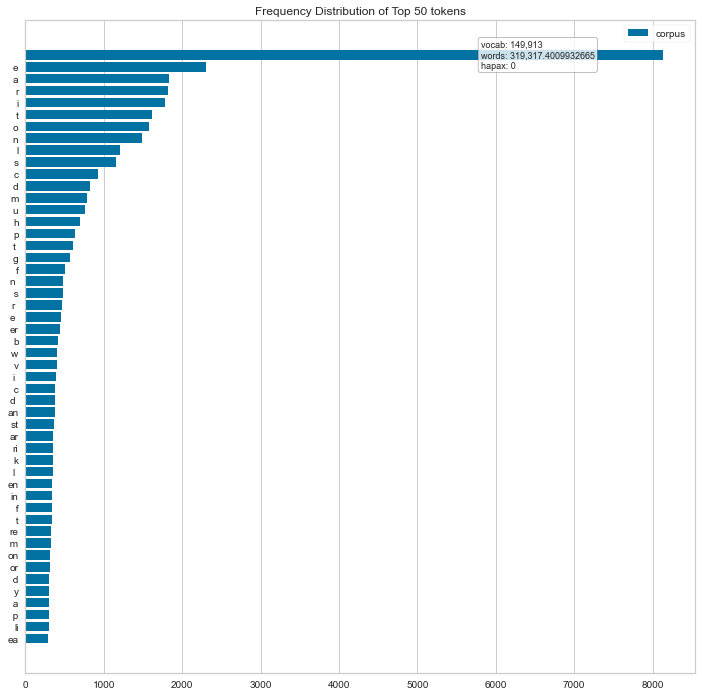

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [136]:
from yellowbrick.text.freqdist import FreqDistVisualizer 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Get all features (tokens)
features = custom_vec_v1.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(12, 12))
visualizer = FreqDistVisualizer(features=features, n = 50)
visualizer.fit(X_vectorized_v1)
visualizer.poof()

Can see from above - most frequent character is unknown or blanks

We will be splitting the data into three parts (train/test/val with 25% test size) and will continue the same for the whole notebook for consistent analysis.

In [137]:
X_train_v1,X_test,y_train_v1,y_test = train_test_split(X_vectorized_v1, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [138]:
X_train_v1.shape

(14142, 149913)

In [139]:
y_train_v1.value_counts()

0    7844
1    6298
Name: DramaGenre, dtype: int64

In [140]:
X_train.shape

(10606, 149913)

In [141]:
y_train.value_counts()

0    5883
1    4723
Name: DramaGenre, dtype: int64

In [142]:
X_val.shape

(3536, 149913)

In [143]:
y_val.value_counts()

0    1961
1    1575
Name: DramaGenre, dtype: int64

In [144]:
X_test.shape

(4714, 149913)

In [145]:
y_test.value_counts()

0    2614
1    2100
Name: DramaGenre, dtype: int64

Now that data is split proportionaly considering the imbalance - we try different models taught in class. Starting with NB.

### Naive Bayes

All models includes tuning with grid search and retrain the model with best params

In [86]:
start = datetime.datetime.now()

model_NB_grid = MultinomialNB()

#param_grid_NB = {'alpha': [1,2,3,4,5]}  #default 1.0
#param_grid_NB = {'alpha': [2,1.5,2.5,1.8,2.2]}  # attempt 1 = 2.0 best
#param_grid_NB = {'alpha': [1.5,1.1,1.2,1.3,1.4]}  # attempt 2 = 1.5 best
#param_grid_NB = {'alpha': [1.1,1.0,1.05,0.95]}  # attempt 3 = 1.1 best
#param_grid_NB = {'alpha': [0.95,0.99,0.8,0.85,0.7]}  # attempt 4 = 0.1 best
#param_grid_NB = {'alpha': [0.1,0.01,0.05,0.001]}  # attempt 5 = 0.1 best
param_grid_NB = {'alpha': [0.05,0.08,0.09,0.001, 0.04]}  # attempt 3 = 1.1 best

cv_NB = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

grid_NB = GridSearchCV(model_NB_grid, param_grid_NB, cv = cv_NB, scoring = 'f1_micro')
grid_NB.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_NB_grid = end-start

print("Best Parameter: {}".format(grid_NB.best_params_))
print("Best Cross Validation Score: {}".format(grid_NB.best_score_))


Best Parameter: {'alpha': 0.05}
Best Cross Validation Score: 0.6968703966128402


retrain using best params

In [146]:
start = datetime.datetime.now()

model_NB_base = MultinomialNB(alpha = 0.05)

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = datetime.datetime.now()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

64.34896687438506

In [147]:
print(confusion_matrix(y_val, y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_base) * 100)
print(precision_score(y_val,y_val_hat_NB_base) * 100)
print(f1_score(y_val,y_val_hat_NB_base) * 100) 

[[1468  493]
 [ 594  981]]
88.72336413350934
69.25904977375565
62.28571428571429
66.55359565807328
64.34896687438506


We try changing the threshold to find max f1 score

In [148]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.273, F-Score=0.68921


In [149]:

y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.273, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100) 

[[ 997  964]
 [ 240 1335]]
88.72336413350934
65.9502262443439
84.76190476190476
58.06872553284037
68.92101187403202


Moving the threshold has given better F1 but variance is remains large and is not expected to change just on threshold.

The threshold checks will be continously checked on all models in this notebook to find the best model

### Logistic Regression

In [93]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 500)

#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
#param_grid_LR = {'solver': ['saga'],                                                  # attempt1 saga
#                    'C': [int(x) for x in range(1,30,5)]}                             # Default 1.0
param_grid_LR = {'solver': ['saga'],  
                    'C': [1, 0.1, 0.5, 2, 3, 1.1, 1.5]}                                 # attemp2 - 1
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [1.5],                                                        # attempt3 - 27
#                'penalty': ['l1', 'l2', 'elasticnet']}                                 # default l2


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 1.5, 'solver': 'saga'}
Best Cross Validation Score: 0.6970598102150228


In [150]:
start = datetime.datetime.now()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 300,
                                  solver = 'saga',
                                  C = 1.5,
                                  penalty = 'l2')

model_LR_base.fit(X_train, y_train)
y_val_hat_LR_base = model_LR_base.predict(X_val)

end = datetime.datetime.now()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train)

f1_score(y_val,y_val_hat_LR_base) * 100 

67.15462031107045

In [151]:
print(confusion_matrix(y_val, y_val_hat_LR_base))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_base) * 100)
print(precision_score(y_val,y_val_hat_LR_base) * 100)
print(f1_score(y_val,y_val_hat_LR_base) * 100) 

[[1358  603]
 [ 474 1101]]
82.60418630963605
69.5418552036199
69.9047619047619
64.61267605633803
67.15462031107045


In [152]:
pred_lr_base_prob = model_LR_base.predict_proba(X_val)

lr_base_prob_class1 = pred_lr_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.395, F-Score=0.69364


In [153]:
y_val_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.395, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100) 

[[1018  943]
 [ 238 1337]]
82.60418630963605
66.60067873303167
84.88888888888889
58.64035087719298
69.36446173800259


### SGD Classifier

In [154]:
from sklearn.linear_model import SGDClassifier

In [84]:
start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter = 5000)

#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}        # Default lbfgs
param_grid_sgd = {'loss': ['log'],                                             # attempt1 newton-cg
                    'alpha': [0.0001,0.0002,0.00009,0.0003]}                             # Default 1.0
#param_grid_sgd = {'loss': ['log'],                                             # attempt1 newton-cg
#                    'alpha': [0.0001],
#                     'epsilon': [0.1,0.2,0.01,0.001,0.0001,1]}                          # attemp2 - 31

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 0.0001, 'loss': 'log'}
Best Cross Validation Score: 0.6973427223136017


In [155]:
start = datetime.datetime.now()

model_sgd_base = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'log',
                             alpha = 0.0001,
                              epsilon = 0.1)

model_sgd_base.fit(X_train, y_train)
y_val_hat_sgd_base = model_sgd_base.predict(X_val)

end = datetime.datetime.now()
total_time_sgd_base = end-start

y_train_hat_sgd_base = model_sgd_base.predict(X_train)

f1_score(y_val,y_val_hat_sgd_base) * 100 

68.62689123608335

In [156]:
print(confusion_matrix(y_val, y_val_hat_sgd_base))
print(accuracy_score(y_train,y_train_hat_sgd_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_base) * 100)
print(precision_score(y_val,y_val_hat_sgd_base) * 100)
print(f1_score(y_val,y_val_hat_sgd_base) * 100)

[[1235  726]
 [ 373 1202]]
79.24759570054685
68.91968325791855
76.31746031746032
62.344398340248965
68.62689123608335


In [157]:
pred_sgd_base_prob = model_sgd_base.predict_proba(X_val)

sgd_base_prob_class1 = pred_sgd_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(sgd_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.433, F-Score=0.69213


In [158]:
y_val_hat_sgd_probs = np.where(sgd_base_prob_class1 >= 0.433, 1, 0)

print(confusion_matrix(y_val, y_val_hat_sgd_probs))
print(accuracy_score(y_train,y_train_hat_sgd_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_probs) * 100)
print(precision_score(y_val,y_val_hat_sgd_probs) * 100)
print(f1_score(y_val,y_val_hat_sgd_probs) * 100)

[[ 968  993]
 [ 216 1359]]
79.24759570054685
65.80882352941177
86.28571428571429
57.78061224489795
69.2131398013751


#### Conclusion from Round 1 of TFIDF

Continuing to see stabler models after removing stop models

Best model found this round is - SGD (high f1 score and the stablest of models in this round) 

Note: SVM is not run in this round since feature are close to 150,000

## Round 2 - TFIDF Part 2

Now in Round 2, we make use of all preprocessing from round 1 with two addional changes.

1. Repalce '-' with space
2. Replace non alphanumeric chars with space instead of empty
3. Tune TFIDF - addiotional params


In [159]:
def clean_text_v4(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    
    text = re.sub("[-]"," ",text)
    #text = re.sub("[0-9]"," ",text)
    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    # convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    #stemming
    text = ' '.join([porter.stem(word) for word in text.split()])
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [160]:
movie_story_dataset['CleanText_tfidf2'] = movie_story_dataset['story'].apply(clean_text_v4)

In [161]:
movie_story_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  \
0                                 Comedy           0   
1                          Comedy|Horror           0   
2                            Documentary           0   
3                                 Comedy           0   
4      Animation|Children|Comedy|Fantasy           0   
...                                  ...         ...   
19995               Action|Horror|Sci-Fi           0   
19996                      Drama|Romance           1   
19997                             Horror           0   
19998                        Documentary           0   
19999                     Comedy|Musical           0   

                                      CleanText_cv_part1  \
0      a girl who always tends to fall in love with t...   
1      bigfoot has come to the town of ellwood city  ...   
2      at an altitude of 18 000 feet  alaska  s mount...   
3      in her first special since 2003  ellen revisit...   
4      mike and sulley are back at monsters universit...   
...                                                  ...   
19995  the iconic creatures from two of the scariest ...   
19996  when a bored with life english teacher meets a...   
19997  herbert blount is a crowdfunding contributor f...   
19998  real boy is the coming of age story of bennett...   
19999  following a childhood tragedy  dewey cox follo...   

                                      CleanText_cv_part2  \
0      girl always tends fall love wrong guy meets on...   
1      bigfoot come town ellwood city pa causing big ...   
2      altitude 18 000 feet alaska mount st elias des...   
3      first special since 2003 ellen revisits road s...   
4      mike sulley back monsters university fun fille...   
...                                                  ...   
19995  iconic creatures two scariest film franchises ...   
19996  bored life english teacher meets west coast sw...   
19997  herbert blount crowdfunding contributor new ad...   
19998  real boy coming age story bennett wallace tran...   
19999  following childhood tragedy dewey cox follows ...   

                                        CleanText_tfidf1  \
0      girl alway tend fall love wrong guy meet one b...   
1      bigfoot come town ellwood citi pa caus big pro...   
2      altitud 18000 foot alaska mount st elia destin...   
3      first special sinc 2003 ellen revisit road sta...   
4      mike sulley back monster univers funfil weeken...   
...                                                  .

In [162]:
#movie_story_dataset.to_csv('movie_story_dataset_v2.csv', index=False)

In [163]:
X = movie_story_dataset['CleanText_tfidf2']
y = movie_story_dataset['DramaGenre']

Need to retune the TFIDF vectorizer:

In [183]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'tfidf__analyzer': ['char_wb'],
    #'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(2, 6)],
    'tfidf__min_df': [0.001],                            #0.002, 0.001, 0.0009
    'tfidf__max_df': [0.4, 0.42, 0.41],
    'nb__alpha': (1, 0.9, 1.1)
}
grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

#https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='char_wb', max_df=0.41, min_df=0.001,
                ngram_range=(2, 6))), ('nb', MultinomialNB(alpha=0.9))]


In [164]:
custom_vec_v2 = TfidfVectorizer(analyzer='char_wb',
                                #strip_accents = 'ascii',
                                #stop_words = 'english',
                                max_df = .41,
                                min_df= .001,
                                use_idf = True,
                                smooth_idf = False,
                                sublinear_tf = True,
                                #tokenizer = lambda x: x.split(),
                                ngram_range=(2, 6))

X_vectorized_v2 = custom_vec_v2.fit_transform(X)
X_vectorized_v2.shape 

(18856, 36996)

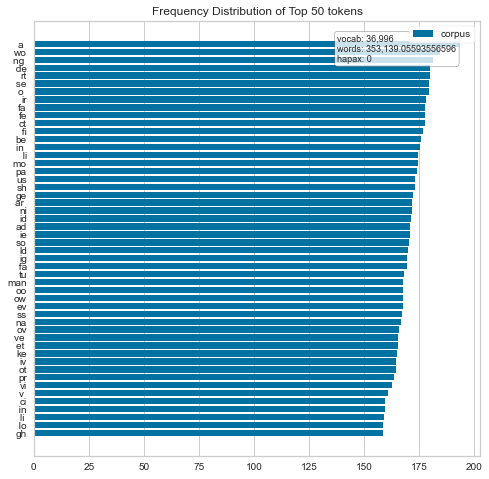

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [165]:
from yellowbrick.text.freqdist import FreqDistVisualizer 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Get all features (tokens)
features = custom_vec_v2.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n = 50)
visualizer.fit(X_vectorized_v2)
visualizer.poof()

In [166]:
#df_vec_v2 = pd.DataFrame(X_vectorized_v2.toarray(), columns = custom_vec_v2.get_feature_names_out())
#df_vec_v2.to_csv('df_vec_v2.csv', index=False)

In [167]:
X_train_v2,X_test,y_train_v2,y_test = train_test_split(X_vectorized_v2, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v2, y_train_v2, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v2)

In [168]:
X_train_v2.shape

(14142, 36996)

In [169]:
y_train_v2.value_counts()

0    7844
1    6298
Name: DramaGenre, dtype: int64

In [170]:
X_train.shape

(10606, 36996)

In [171]:
y_train.value_counts()

0    5883
1    4723
Name: DramaGenre, dtype: int64

In [172]:
X_val.shape

(3536, 36996)

In [173]:
y_val.shape

(3536,)

In [174]:
X_test.shape

(4714, 36996)

In [175]:
y_test.value_counts()

0    2614
1    2100
Name: DramaGenre, dtype: int64

### Naive Bayes

In [196]:
start = datetime.datetime.now()

model_NB_grid = MultinomialNB()


#param_grid_NB = {'alpha': [1,2,3,4,5]}  #default 1.0
#param_grid_NB = {'alpha': [2,1.5,2.5,1.8,2.2]}  # attempt 1 = 2.0 best
#param_grid_NB = {'alpha': [1.5,1.1,1.2,1.3,1.4]}  # attempt 2 = 1.5 best
#param_grid_NB = {'alpha': [1.1,1.0,1.05,0.95]}  # attempt 3 = 1.1 best
param_grid_NB = {'alpha': [1, 0.95,0.6,0.8,0.5,0.7]}  # attempt 4 = 0.1 best
#param_grid_NB = {'alpha': [0.1,0.01,0.05,0.001]}  # attempt 5 = 0.1 best
#param_grid_NB = {'alpha': [0.1,0.08,0.09,0.095]}  # attempt 3 = 1.1 best

cv_NB = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

grid_NB = GridSearchCV(model_NB_grid, param_grid_NB, cv = cv_NB, scoring = 'f1_micro')
grid_NB.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_NB_grid = end-start

print("Best Parameter: {}".format(grid_NB.best_params_))
print("Best Cross Validation Score: {}".format(grid_NB.best_score_))


Best Parameter: {'alpha': 0.6}
Best Cross Validation Score: 0.7026220004523678


In [176]:
start = datetime.datetime.now()

model_NB_base = MultinomialNB(alpha = 0.6)

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = datetime.datetime.now()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

65.80310880829016

In [177]:
print(confusion_matrix(y_val, y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_base) * 100)
print(precision_score(y_val,y_val_hat_NB_base) * 100)
print(f1_score(y_val,y_val_hat_NB_base) * 100) 

[[1464  497]
 [ 559 1016]]
77.30529888742221
70.13574660633483
64.5079365079365
67.15135492399207
65.80310880829016


In [178]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.278, F-Score=0.70078


In [179]:
y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.278, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100) 

[[1022  939]
 [ 219 1356]]
77.30529888742221
67.25113122171946
86.09523809523809
59.08496732026144
70.07751937984496


### Logistic Regression

In [205]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced')


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
#param_grid_LR = {'solver': ['newton-cg'],                                             # attempt1 liblinear
#                    'C': [int(x) for x in range(1,15,2)]}                             # Default 1.0
#param_grid_LR = {'solver': ['newton-cg'],  
#                    'C': [1,0.1,0.5,0.01,0.001]}
param_grid_LR = {'solver': ['newton-cg'],  
                    'C': [1, 0.6, 0.5, 0.1, 0.4, 0.7, 0.2, 0.9]}
#param_grid_LR = {'solver': ['liblinear'],  
#                    'C': [0.7],                                                         # attempt3 - 27
#                'penalty': ['l1', 'l2']}                         # default l2


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 0.6, 'solver': 'newton-cg'}
Best Cross Validation Score: 0.7013025050080962


In [180]:
start = datetime.datetime.now()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced',
                                  C = 0.6,
                                  solver = 'newton-cg')

model_LR_base.fit(X_train, y_train)
y_val_hat_LR_base = model_LR_base.predict(X_val)

end = datetime.datetime.now()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train)

f1_score(y_val,y_val_hat_LR_base) * 100 

67.05343511450383

In [181]:
print(confusion_matrix(y_val, y_val_hat_LR_base))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_base) * 100)
print(precision_score(y_val,y_val_hat_LR_base) * 100)
print(f1_score(y_val,y_val_hat_LR_base) * 100)  #f1 65.88, 1753 rights

[[1359  602]
 [ 477 1098]]
79.19102394870828
69.48529411764706
69.71428571428572
64.58823529411765
67.05343511450383


In [182]:
pred_lr_base_prob = model_LR_base.predict_proba(X_val)

lr_base_prob_class1 = pred_lr_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.446, F-Score=0.69481


In [183]:
y_val_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.446, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100)  #f1 65.88, 1753 rights

[[1171  790]
 [ 316 1259]]
79.19102394870828
68.72171945701358
79.93650793650794
61.44460712542704
69.48123620309052


### MLP 

In [184]:
from sklearn.neural_network import MLPClassifier
import datetime


In [137]:
# start = datetime.datetime.now()

# model_mlp = MLPClassifier(random_state = 0)

# #param_grid_mlp = {'solver': ['lbfgs', 'sgd', 'adam']}        # Default lbfgs
# #param_grid_svm = {'solver': ['lbfgs'],                                             # attempt1 newton-cg
# #                    'activation': ['identity', 'logistic', 'tanh', 'relu']}                             # Default 1.0
# #param_grid_svm = {'solver': ['lbfgs'], 
# #                    'activation': ['identity'],
# #                    'alpha': [0.0001,0.0002,0.0005,0.009,0.007]}
# param_grid_mlp = {#'solver': ['lbfgs', 'sgd', 'adam'], 
#                   #  'activation': ['identity', 'logistic', 'tanh', 'relu'],
# #                    'alpha': [0.0001,0.0002,0.0005,0.009,0.007],
#                      'hidden_layer_sizes': [(700,),(900,),(1100,),(1300,)]}


# cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

# grid_mlp = GridSearchCV(model_mlp, param_grid_mlp, cv = cv, scoring = 'f1_micro')
# grid_mlp.fit(X_train, y_train)

# end = datetime.datetime.now()
# total_time_mlp = end-start

# print("Best Parameter: {}".format(grid_mlp.best_params_))
# print("Best Cross Validation Score: {}".format(grid_mlp.best_score_))

Best Parameter: {'hidden_layer_sizes': (1300,)}
Best Cross Validation Score: 0.6600046454225255


In [138]:
total_time_mlp #very high time taken to tune MLP so droping

datetime.timedelta(seconds=7644, microseconds=787435)

In [85]:
start = datetime.datetime.now()

mlp_clf = MLPClassifier(random_state = 0,
                       activation = 'identity',
                        solver = 'lbfgs',
                        alpha = 0.0002,
                        hidden_layer_sizes = (500,),
                        early_stopping = True                        
                       ).fit(X_train, y_train)
y_val_hat_mlp_r2 = mlp_clf.predict(X_val)

end = datetime.datetime.now()
total_time_mlp_r2 = end-start

y_train_hat_mlp_r2 = mlp_clf.predict(X_train)

f1_score(y_val,y_val_hat_mlp_r2) * 100 

60.551330798479086

Since MLP takes a lot of time to tune, we are not continuing the analysis and the improvment after tuning is not expected to be much higher.

For same reasons, not trying SVM as well. Since features are very high.

Also, as a solution truncateSVD could be used but that too is time consuming process with data loss, thus no point of pursuing them for minor improvments in performances

### SGD Classifier

In [214]:
from sklearn.linear_model import SGDClassifier

start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter=1000)


#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}        # Default lbfgs
param_grid_sgd = {'loss': ['huber'],                                             # attempt1 newton-cg
                    'alpha': [9e-05, 8e-05, 7e-05, 9e-06]}                             # Default 1.0
#param_grid_sgd = {'loss': ['log'],                                             # attempt1 newton-cg
#                    'alpha': [0.0002],
#                     'epsilon': [0.1,0.01,0.001,1,5]}                          # attemp2 - 31


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 7e-05, 'loss': 'huber'}
Best Cross Validation Score: 0.699793996044724


In [185]:
start = time.time()

model_sgd_r2 = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'huber',
                             alpha = 7e-05,
                              epsilon = 0.1)

model_sgd_r2.fit(X_train, y_train)
y_val_hat_sgd_r2 = model_sgd_r2.predict(X_val)

end = time.time()
total_time_sgd_r2 = end-start

y_train_hat_sgd_r2 = model_sgd_r2.predict(X_train)

f1_score(y_val,y_val_hat_sgd_r2) * 100 

67.73713945881653

In [186]:
print(confusion_matrix(y_val, y_val_hat_sgd_r2))
print(accuracy_score(y_train,y_train_hat_sgd_r2, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_r2, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_r2) * 100)
print(precision_score(y_val,y_val_hat_sgd_r2) * 100)
print(f1_score(y_val,y_val_hat_sgd_r2) * 100)  #f1 65.88, 1753 rights

[[1312  649]
 [ 436 1139]]
76.24929285310202
69.31561085972851
72.31746031746032
63.702460850111855
67.73713945881653


#### Conclusions from Round 2 of TFIDF

Difference between in-sam and out-sam is further improved by tuning the TFIDF

Best model in this round - Logistic Regression - stability (difference is 10%)
f1 score is 70%

#### Conclusions from TFIDF

Still searching for higher performances techniques rather than just models, currently best performance is at 70% by Logistic in this round.

###### Next round ideas

We may try some tag based analysis - since performance is at 70 - models are not able to differentiate between drama and nondrama movies.

POS tagging and pure drama movies - needs to be analyzed to see for better performance

## Round 3 - Tag Analysis - Part 1 - 1tags

Here we analyze movies with tag sizes. If a movie has genre just either just drama, comedy or documentary and so on.. they are 1 tag movies.

We wanted to understand the reasons of why the models are performing not well enough for 80 and above in accuracy or f1 score.

So if drama movies within single tagged movie genres is also in similar performance range that would help us understand the direction in which next step should be taken.

So this round is more for analysis if further improvements possible and word cloud preps

In [187]:
movie_story_dataset.shape

(18856, 9)

In [188]:
movie_story_dataset_v3 = movie_story_dataset.copy() #a copy made from above data to avoid clutter

In [189]:
movie_story_dataset_v3

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  \
0                                 Comedy           0   
1                          Comedy|Horror           0   
2                            Documentary           0   
3                                 Comedy           0   
4      Animation|Children|Comedy|Fantasy           0   
...                                  ...         ...   
19995               Action|Horror|Sci-Fi           0   
19996                      Drama|Romance           1   
19997                             Horror           0   
19998                        Documentary           0   
19999                     Comedy|Musical           0   

                                      CleanText_cv_part1  \
0      a girl who always tends to fall in love with t...   
1      bigfoot has come to the town of ellwood city  ...   
2      at an altitude of 18 000 feet  alaska  s mount...   
3      in her first special since 2003  ellen revisit...   
4      mike and sulley are back at monsters universit...   
...                                                  ...   
19995  the iconic creatures from two of the scariest ...   
19996  when a bored with life english teacher meets a...   
19997  herbert blount is a crowdfunding contributor f...   
19998  real boy is the coming of age story of bennett...   
19999  following a childhood tragedy  dewey cox follo...   

                                      CleanText_cv_part2  \
0      girl always tends fall love wrong guy meets on...   
1      bigfoot come town ellwood city pa causing big ...   
2      altitude 18 000 feet alaska mount st elias des...   
3      first special since 2003 ellen revisits road s...   
4      mike sulley back monsters university fun fille...   
...                                                  ...   
19995  iconic creatures two scariest film franchises ...   
19996  bored life english teacher meets west coast sw...   
19997  herbert blount crowdfunding contributor new ad...   
19998  real boy coming age story bennett wallace tran...   
19999  following childhood tragedy dewey cox follows ...   

                                        CleanText_tfidf1  \
0      girl alway tend fall love wrong guy meet one b...   
1      bigfoot come town ellwood citi pa caus big pro...   
2      altitud 18000 foot alaska mount st elia destin...   
3      first special sinc 2003 ellen revisit road sta...   
4      mike sulley back monster univers funfil weeken...   
...                                                  .

In [190]:
# split by | and count for tag counts

movie_story_dataset_v3["tag_count"] = movie_story_dataset_v3['genres'].apply(lambda text: len(text.split("|")))
movie_story_dataset_v3.head()

movie_id                                              story  \
0    131072  A girl who always tends to fall in love with t...   
1    196609  Bigfoot has come to the town of Ellwood City, ...   
2    131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3    196611  In her first special since 2003, Ellen revisit...   
4    196613  Mike and Sulley are back at Monsters Universit...   

                               title                             genres  \
0            Jesus liebt mich (2012)                             Comedy   
1           Bigfoot The Movie (2015)                      Comedy|Horror   
2             Mount St. Elias (2009)                        Documentary   
3  Ellen DeGeneres: Relatable (2018)                             Comedy   
4               Party Central (2014)  Animation|Children|Comedy|Fantasy   

   DramaGenre                                 CleanText_cv_part1  \
0           0  a girl who always tends to fall in love with t...   
1           0  bigfoot has come to the town of ellwood city  ...   
2           0  at an altitude of 18 000 feet  alaska  s mount...   
3           0  in her first special since 2003  ellen revisit...   
4           0  mike and sulley are back at monsters universit...   

                                  CleanText_cv_part2  \
0  girl always tends fall love wrong guy meets on...   
1  bigfoot come town ellwood city pa causing big ...   
2  altitude 18 000 feet alaska mount st elias des...   
3  first special since 2003 ellen revisits road s...   
4  mike sulley back monsters university fun fille...   

                                    CleanText_tfidf1  \
0  girl alway tend fall love wrong guy meet one b...   
1  bigfoot come town ellwood citi pa caus big pro...   
2  altitud 18000 foot alaska mount st elia destin...   
3  first special sinc 2003 ellen revisit road sta...   
4  mike sulley back monster univers funfil weeken...   

                                    CleanText_tfidf2  tag_count  
0  girl alway tend fall love wrong guy meet one b...          1  
1  bigfoot come town ellwood citi pa caus big pro...          2  
2  altitud 18 000 foot alaska mount st elia desti...          1  
3  first special sinc 2003 ellen revisit road sta...          1  
4  mike sulley back monster univers fun fill week...          4

In [191]:
movie_story_dataset_v3.tag_count.value_counts()

1     8702
2     5646
3     3273
4      937
5      240
6       47
7       10
10       1
Name: tag_count, dtype: int64

Can see above one tag movies are max in train set at 8702. Majority of movies has 1, 2 and 3 tags in the genre column - 16K

Also, surprisingly there are movies with multiple tags above 5 as well.

In [192]:
# can use count vectorizer to find all possible tags within genre column

# using count vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split('|'))

tag_dtm = vectorizer.fit_transform(movie_story_dataset_v3['genres'])

In [193]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 18856
Number of unique tags : 19


Can see there are 19 different tags in genre

In [194]:
# some of the tags
tags = vectorizer.get_feature_names_out()

print("Some of the tags we have :", tags[:20])

Some of the tags we have : ['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'film-noir' 'horror' 'imax' 'musical'
 'mystery' 'romance' 'sci-fi' 'thriller' 'war' 'western']


In [195]:
movie_story_dataset_v3[movie_story_dataset_v3.tag_count.isin([10,7])]

movie_id                                              story  \
4015      74406  Mr. Sekhri is the Indian Ambassador in Russia,...   
5503     144324  The film is a heist comedy set in 1940s Korea,...   
5668      79132  Cobb, a skilled thief who commits corporate es...   
6103      81132  In the California desert, the adventures of a ...   
6274      81847  When the kingdom\'s most wanted-and most charm...   
7090      85261  When Martians suddenly abduct his mom, mischie...   
10527     32031  Rodney Copperbottom is a young robot inventor ...   
11722    166163  Set in the year 2020, Shiori Genbo (Ayame Gour...   
14929     43932  When their computer hacker friend accidentally...   
18191     52462  An action epic that explores the origins of th...   
19766     56152  The beautiful princess Giselle is banished by ...   

                                                   title  \
4015                      Lucky: No Time For Love (2005)   
5503                             Once Upon a Time (2008)   
5668                                    Inception (2010)   
6103                                       Rubber (2010)   
6274                                      Tangled (2010)   
7090                              Mars Needs Moms (2011)   
10527                                      Robots (2005)   
11722                                Black Butler (2014)   
14929                                       Pulse (2006)   
18191  Aqua Teen Hunger Force Colon Movie Film for Th...   
19766                                   Enchanted (2007)   

                                                  genres  DramaGenre  \
4015   Action|Adventure|Drama|Musical|Romance|Thrille...           1   
5503   Action|Adventure|Comedy|Crime|Drama|Romance|Th...           1   
5668     Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX           1   
6103   Action|Adventure|Comedy|Crime|Drama|Film-Noir|...           1   
6274   Animation|Children|Comedy|Fantasy|Musical|Roma...           0   
7090   Action|Adventure|Animation|Children|Comedy|Sci...           0   
10527  Adventure|Animation|Children|Comedy|Fantasy|Sc...           0   
11722  Action|Adventure|Crime|Drama|Fantasy|Horror|My...           1   
14929  Action|Drama|Fantasy|Horror|Mystery|Sci-Fi|Thr...           1   
18191  Action|Adventure|Animation|Comedy|Fantasy|Myst...           0   
19766  Adventure|Animation|Children|Comedy|Fantasy|Mu...           0   

                                      CleanText_cv_part1  \
4015   mr  sekhri is the indian ambassador in russia ...   
5503   the film is a heist comedy set in 1940s korea ...   
5668   cobb  a skilled thief who commits corporate es...   
6103   in the california desert  the adventures of a ...   
6274   when the kingdom  s most wanted and most charm...   
7090   when martians suddenly abduct his mom  mischie...   
10527  rodney copperbottom is a young robot inventor ...   
11722  set in the year 2020  shiori genbo  ayame gour...   
14929  when their computer hacker friend accidentally...   
18191  an action epic that explores the origins of th...   
19766  the beautiful princess giselle is banished by ...   

                                      CleanText_cv_part2  \
4015   mr sekhri indian ambassador russia chief assis...   
5503   film heist comedy set 1940s korea stars park y...   
5668   cobb skilled thief commits corporate espionage...   
6103   california desert adventures telepathic killer...   
6274   kingdom wanted charming bandit flynn rider hid...   
7090   martians suddenly abduct mom mischievous milo ...   
10527  rodney copperbottom young robot inventor dream...   
11722  set year 2020 shiori genbo ayame gouriki runs ...   
14929  computer hacker friend accidentally channels m...   
18191  action epic explores origins aqua teen hunger ...   
19766  beautiful princess giselle banished evil queen...   

                                        CleanText_tfidf1  \
4015   mr sekhri indian ambassador russia chief assis...   
5503   film heist 

In [196]:
movie_story_dataset_v3.shape

(18856, 10)

In [197]:
#movie_story_dataset_v3.drop(movie_story_dataset_v3[movie_story_dataset_v3.tag_count.isin([10,7,6,5])].index,
#                         inplace=True)

In [198]:
movie_story_dataset_v3.shape

(18856, 10)

In [199]:
#word_tokenize(movie_story_dataset_v3.iloc[4]['story'])

In [200]:
#for this analysis we remove stemming since words resulted from it are not found in regular human dictionary.
#same preprocess steps done from round 2 of tfidf except - the comma not hyphen (-)

def clean_text_v5(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    
    text = re.sub("[,]","",text)
    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    # convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [201]:
movie_story_dataset_v3['CleanText'] = movie_story_dataset_v3['story'].apply(clean_text_v5)

In [202]:
#word_tokenize(movie_story_dataset_v3.iloc[4]['CleanText'])

In [203]:
movie_story_dataset_v3

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

                                            title  \
0                         Jesus liebt mich (2012)   
1                        Bigfoot The Movie (2015)   
2                          Mount St. Elias (2009)   
3               Ellen DeGeneres: Relatable (2018)   
4                            Party Central (2014)   
...                                           ...   
19995  AVPR: Aliens vs. Predator - Requiem (2007)   
19996                      Love N' Dancing (2009)   
19997                       Director's Cut (2018)   
19998                             Real Boy (2016)   
19999       Walk Hard: The Dewey Cox Story (2007)   

                                  genres  DramaGenre  \
0                                 Comedy           0   
1                          Comedy|Horror           0   
2                            Documentary           0   
3                                 Comedy           0   
4      Animation|Children|Comedy|Fantasy           0   
...                                  ...         ...   
19995               Action|Horror|Sci-Fi           0   
19996                      Drama|Romance           1   
19997                             Horror           0   
19998                        Documentary           0   
19999                     Comedy|Musical           0   

                                      CleanText_cv_part1  \
0      a girl who always tends to fall in love with t...   
1      bigfoot has come to the town of ellwood city  ...   
2      at an altitude of 18 000 feet  alaska  s mount...   
3      in her first special since 2003  ellen revisit...   
4      mike and sulley are back at monsters universit...   
...                                                  ...   
19995  the iconic creatures from two of the scariest ...   
19996  when a bored with life english teacher meets a...   
19997  herbert blount is a crowdfunding contributor f...   
19998  real boy is the coming of age story of bennett...   
19999  following a childhood tragedy  dewey cox follo...   

                                      CleanText_cv_part2  \
0      girl always tends fall love wrong guy meets on...   
1      bigfoot come town ellwood city pa causing big ...   
2      altitude 18 000 feet alaska mount st elias des...   
3      first special since 2003 ellen revisits road s...   
4      mike sulley back monsters university fun fille...   
...                                                  ...   
19995  iconic creatures two scariest film franchises ...   
19996  bored life english teacher meets west coast sw...   
19997  herbert blount crowdfunding contributor new ad...   
19998  real boy coming age story bennett wallace tran...   
19999  following childhood tragedy dewey cox follows ...   

                                        CleanText_tfidf1  \
0      girl alway tend fall love wrong guy meet one b...   
1      bigfoot come town ellwood citi pa caus big pro...   
2      altitud 18000 foot alaska mount st elia destin...   
3      first special sinc 2003 ellen revisit road sta...   
4      mike sulley back monster univers funfil weeken...   
...                                                  .

In [204]:
movies_1tags = movie_story_dataset_v3[movie_story_dataset_v3['tag_count'] == 1]
movies_1tags['genres'].value_counts()

Drama          3037
Documentary    2355
Comedy         1683
Horror          541
Thriller        387
Animation       142
Action          136
Romance         115
Sci-Fi           88
Children         50
Adventure        36
Fantasy          30
Mystery          29
Crime            27
Western          25
War              13
Musical           8
Name: genres, dtype: int64

Out of 8027, 1 tag movies there are about 3037 Drama movies which are pure drama.

In [205]:
movies_2tags = movie_story_dataset_v3[movie_story_dataset_v3['tag_count'] == 2]
movies_2tags['DramaGenre'].value_counts()

1    2873
0    2773
Name: DramaGenre, dtype: int64

Above is drama and non drama movie distribution within 2tag movies. This shows data is evenly imbalanced from begining within muti tags.

In [206]:
movies_drama = movie_story_dataset_v3[movie_story_dataset_v3['genres'] == 'Drama']
movies_documentary = movie_story_dataset_v3[movie_story_dataset_v3['genres'] == 'Documentary']
movies_comedy = movie_story_dataset_v3[movie_story_dataset_v3['genres'] == 'Comedy']

#### Pure Drama movies analysis - (1 TAG)

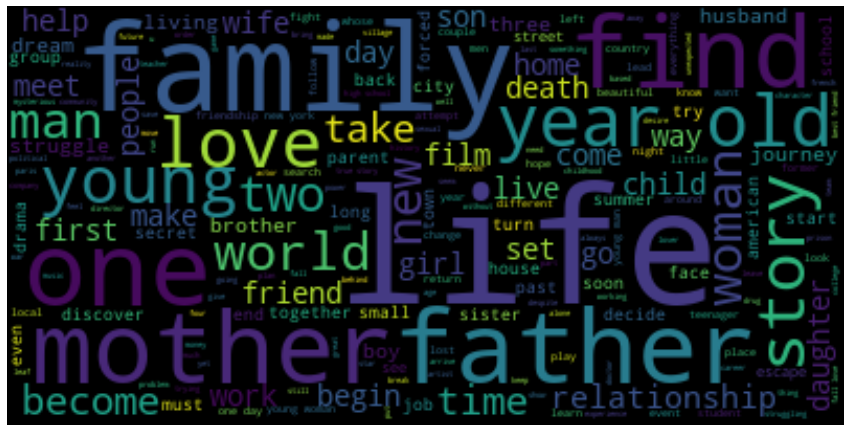

In [207]:
Drama_movies_trainclean = movies_1tags[movies_1tags['genres'] == 'Drama']

story_train = " ".join(story for story in Drama_movies_trainclean['CleanText'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story_train)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Pure non drama movie analysis - (1 TAG)

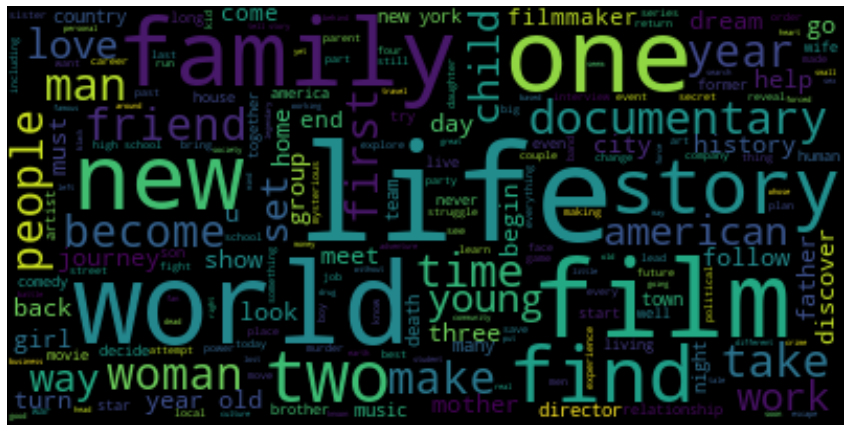

In [208]:
Drama_movies_trainclean = movies_1tags[movies_1tags['genres'] != 'Drama']

story_train = " ".join(story for story in Drama_movies_trainclean['CleanText'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story_train)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

#### Further analysis into document and comedy since there are frequent 1 tag movies

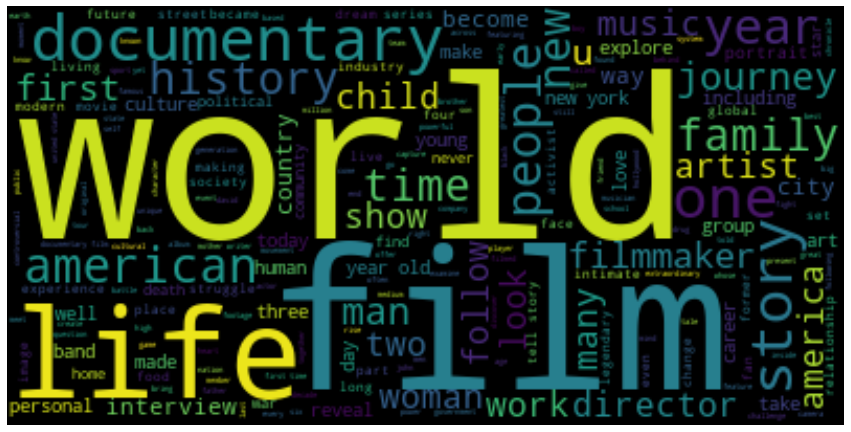

In [209]:
story_train = " ".join(story for story in movies_documentary['CleanText'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story_train)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

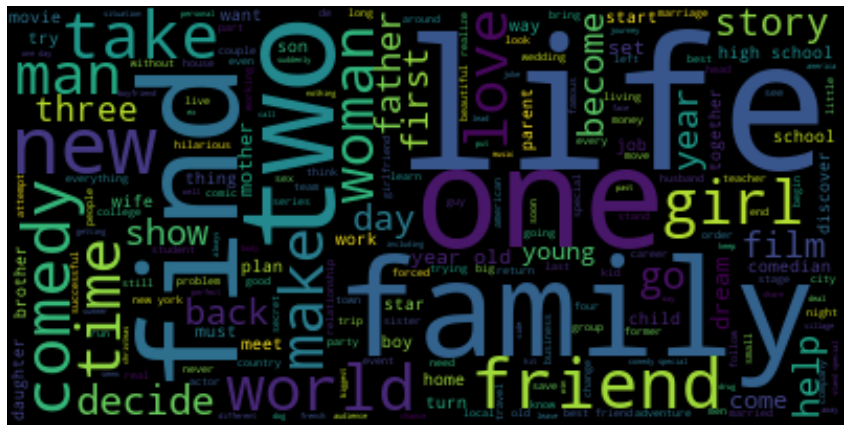

In [210]:
story_train = " ".join(story for story in movies_comedy['CleanText'])
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)

wordcloud = WordCloud().generate(story_train)
plt.subplots(1, 1, figsize=(15, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

Can see that some common words such as life, one, family, friend, woman, mother, father are common across these clouds of drama and non drama genres. Anf thus causing models to not differentiate between genres

A sample prediction on 1-tag movies between drama and drama further solidifies the above conclusion

In [211]:
X = movies_1tags['CleanText']
y = movies_1tags['DramaGenre']

In [212]:
X.shape

(8702,)

In [213]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'tfidf__analyzer': ['word'], # char, char_wb tried
    #'tfidf__max_df': (0.25, 0.5, 0.75),
    #'tfidf__ngram_range': [(2, 6), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5)],
    'tfidf__ngram_range': [(1, 1)],
    'tfidf__min_df': [0.002, 0.003, 0.004],                            
    #'tfidf__max_df': [0.4, 0.42, 0.41],
    'nb__alpha': (1, 0.9, 1.1)
}
grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

#https://stackoverflow.com/questions/44066264/how-to-choose-parameters-in-tfidfvectorizer-in-sklearn-during-unsupervised-clust

KeyboardInterrupt: 

In [214]:
custom_vec_v3 = TfidfVectorizer(analyzer='word',
                                 #strip_accents = 'ascii',
                                 #stop_words = 'english',
                                #max_df = .20,
                                min_df= .002,
                                use_idf = True,
                                smooth_idf = False,
                                sublinear_tf = True,
                                #tokenizer = lambda x: x.split(),
                                ngram_range=(1, 1))

X_vectorized_v3 = custom_vec_v3.fit_transform(X)
X_vectorized_v3.shape 

(8702, 2560)

Only 2560 features - so can expect some reduced performances due to data loss

In [215]:
X_train_v3,X_test,y_train_v3,y_test = train_test_split(X_vectorized_v3, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v3, y_train_v3, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v3)

In [216]:
X_train_v3.shape

(6526, 2560)

In [217]:
y_train_v3.value_counts()

0    4248
1    2278
Name: DramaGenre, dtype: int64

In [218]:
X_train.shape

(4894, 2560)

In [219]:
y_train.value_counts()

0    3186
1    1708
Name: DramaGenre, dtype: int64

In [220]:
X_val.shape

(1632, 2560)

In [221]:
y_val.value_counts()

0    1062
1     570
Name: DramaGenre, dtype: int64

In [222]:
X_test.shape

(2176, 2560)

In [223]:
y_test.value_counts()

0    1417
1     759
Name: DramaGenre, dtype: int64

### Naive Bayes

In [224]:
start = time.time()

model_NB_base = MultinomialNB()

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = time.time()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

55.14950166112956

In [225]:
print(confusion_matrix(y_val, y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_base) * 100)
print(precision_score(y_val,y_val_hat_NB_base) * 100)
print(f1_score(y_val,y_val_hat_NB_base) * 100)  #f1 65.88, 1753 rights

[[978  84]
 [321 249]]
80.89497343686146
75.18382352941177
43.684210526315795
74.77477477477478
55.14950166112956


In [226]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.364, F-Score=0.67376


In [227]:
y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.364, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100)  #f1 65.88, 1753 rights

[[760 302]
 [127 443]]
80.89497343686146
73.71323529411765
77.71929824561403
59.46308724832215
67.3764258555133


### Logistic Regression

In [293]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 1000)


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
param_grid_LR = {'solver': ['newton-cg'],                                                  # attempt1 newton-cg
                    'C': [int(x) for x in range(1,20,2)]}                             # Default 1.0
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [0.5, 0.4, 0.3]}
#param_grid_LR = {'solver': ['lbfgs'],  
#                   'C': [1],                                                         # attempt3 - 27
#                'tol': [0.0001, 0.0002, 0.00009],
#                'penalty': ['l1', 'l2']
#                }                                 # default l2


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 3, 'solver': 'newton-cg'}
Best Cross Validation Score: 0.7392720142420345


In [228]:
start = time.time()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced',
                                  solver = 'newton-cg',
                                  C = 3)

model_LR_base.fit(X_train, y_train)
y_val_hat_LR_base = model_LR_base.predict(X_val)

end = time.time()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train)

f1_score(y_val,y_val_hat_LR_base) * 100 

64.62035541195476

In [229]:
print(confusion_matrix(y_val, y_val_hat_LR_base))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_base) * 100)
print(precision_score(y_val,y_val_hat_LR_base) * 100)
print(f1_score(y_val,y_val_hat_LR_base) * 100)  #f1 65.88, 1753 rights

[[794 268]
 [170 400]]
89.08868001634654
73.16176470588235
70.17543859649122
59.88023952095808
64.62035541195476


In [230]:
pred_lr_base_prob = model_LR_base.predict_proba(X_val)

lr_base_prob_class1 = pred_lr_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.456, F-Score=0.66211


In [231]:
y_val_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.456, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100)  #f1 65.88, 1753 rights

[[751 311]
 [134 436]]
89.08868001634654
72.7328431372549
76.49122807017544
58.366800535475235
66.21108580106304


#### Conclusions from 1 tag analysis:

Only NB and LR ran since can see performances are reduced - as expected due to just 2560 features (data loss)

But this does explain why models not performing above 80 or 90, not even pure drama movies the models are able to differentiate froom nondrama movies.

Genres such as comedy and documentary are very much similar key words for identification to drama movies.

## Round 3 - Tag Analysis - Part 2 - POS Tagging

This round of tag analysis is POS tagging.

We try to remove some of the words such are uncommon to represent the whole document like names, places etc.

Lets see if performances can be improved and also its a good excercise to try out how it would be like implementing.

In [232]:
import nltk

In [233]:
movie_story_dataset['story'].iloc[4]

'Mike and Sulley are back at Monsters University for a fun-filled weekend with their Oozma Kappa fraternity brothers. The gang is throwing their first party, but no one\\xe2\\x80\\x99s showing up. Luckily for them, Mike and Sulley have come up with a plan to make sure \\xe2\\x80\\x9cParty Central\\xe2\\x80\\x9d is the most epic party the school has ever seen.'

In [234]:
sentence = movie_story_dataset['story'].iloc[4]
sentence = ' '.join([re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",word) for word in sentence.split()])
sentence = re.sub(r'[-]', ' ', sentence)
sentence = re.sub(r'[^\w\s]', ' ', sentence)

sentence = ' '.join([word for word in sentence.split() if word not in (stop_words) and (len(word) != 1) ])
sentence = ' '.join([Lemmatizer.lemmatize(word) for word in sentence.split()])
tagged_sentence = nltk.tag.pos_tag(sentence.split())
edited_sentence = ' '.join([word for word,tag in tagged_sentence if tag != 'NNP'])
print(tagged_sentence)

[('Mike', 'NNP'), ('Sulley', 'NNP'), ('back', 'RB'), ('Monsters', 'NNP'), ('University', 'NNP'), ('fun', 'NN'), ('filled', 'VBD'), ('weekend', 'NN'), ('Oozma', 'NNP'), ('Kappa', 'NNP'), ('fraternity', 'NN'), ('brother', 'NN'), ('The', 'DT'), ('gang', 'NN'), ('throwing', 'VBG'), ('first', 'JJ'), ('party', 'NN'), ('one', 'CD'), ('showing', 'VBG'), ('Luckily', 'RB'), ('Mike', 'NNP'), ('Sulley', 'NNP'), ('come', 'VBP'), ('plan', 'NN'), ('make', 'VBP'), ('sure', 'JJ'), ('Party', 'NNP'), ('Central', 'NNP'), ('epic', 'NNP'), ('party', 'NN'), ('school', 'NN'), ('ever', 'RB'), ('seen', 'VBN')]


We decided to remove tags with NNP since we see them on names and places

In [235]:
#same preprocess as round 2 of tfidf with additiona to it - remove NNP tags

def clean_text_v6(text):
    
    text = ' '.join([re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",word) for word in text.split()])
    text = ' '.join([re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",word) for word in text.split()])
    
    text = re.sub(r'[-]', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)

    tagged_sentence = nltk.tag.pos_tag(text.split())
    edited_sentence = ' '.join([word for word,tag in tagged_sentence if tag != 'NNP'])
    
    #convert text to lowercase 
    text = edited_sentence.lower()
    
    
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
        
    return text


In [236]:
movie_story_dataset['CleanTextPOS'] = movie_story_dataset['story'].apply(clean_text_v6)

X = movie_story_dataset['CleanTextPOS']
y = movie_story_dataset['DramaGenre']

In [501]:
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

parameters = {
    'cv__analyzer': ['word'],                        #'word' , 'char', 'char_wb'
    'cv__max_df': [0.5],                             #0.5, 0.55, 0.45
    'cv__min_df': [1e-05],                           #1e-05, 1e-04, 1e-06, 1e-02
    'cv__ngram_range': [(1, 1)],
    'cv__binary': [False, True],
    'nb__alpha': [1, 0.9, 1.1]
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=3, verbose=0, scoring = 'f1_micro')
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('cv', CountVectorizer(binary=True, max_df=0.5, min_df=1e-05)), ('nb', MultinomialNB(alpha=1.1))]


In [237]:

vect3 = CountVectorizer(ngram_range = (1,1),
                       analyzer = 'word',
                       max_df = 0.5,
                       min_df = 1e-05,
                        binary = True
                      )
vect3.fit(X)
bag_of_words3 = vect3.transform(X)

In [238]:
(vect3.vocabulary_)

{'girl': 9317,
 'always': 1235,
 'tends': 21301,
 'fall': 8115,
 'love': 12709,
 'wrong': 23891,
 'guy': 9730,
 'meet': 13256,
 'one': 14689,
 'belief': 2410,
 'world': 23822,
 'coming': 4368,
 'end': 7342,
 'next': 14256,
 'come': 4348,
 'town': 21761,
 'causing': 3613,
 'problem': 16367,
 'three': 21490,
 'local': 12601,
 'take': 21077,
 'funded': 9038,
 'campaign': 3370,
 'filmed': 8402,
 'hometown': 10311,
 'hero': 10128,
 'assembled': 1750,
 'colorful': 4323,
 'cast': 3556,
 'character': 3762,
 'region': 17401,
 'bring': 3071,
 'vision': 23214,
 'life': 12428,
 'movie': 13853,
 'feature': 8255,
 'famous': 8140,
 'best': 2476,
 'loved': 12713,
 'celebrity': 3652,
 'like': 12464,
 'stand': 20197,
 'comic': 4365,
 'formerly': 8784,
 'morning': 13765,
 'show': 19207,
 'even': 7724,
 'veteran': 23090,
 'news': 14245,
 'anchor': 1343,
 'among': 1293,
 'others': 14867,
 'comedy': 4355,
 'horror': 10398,
 'flick': 8571,
 'mullet': 13887,
 'gun': 9701,
 'beer': 2350,
 'full': 9017,
 'suppl

In [239]:
freqs = zip(vect3.get_feature_names(), bag_of_words3.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1]))

[('life', 4262), ('year', 2841), ('one', 2806), ('find', 2481), ('young', 2427), ('story', 2197), ('world', 2112), ('family', 1972), ('two', 1945), ('friend', 1913), ('love', 1849), ('man', 1810), ('take', 1770), ('woman', 1701), ('old', 1670), ('get', 1584), ('new', 1550), ('time', 1532), ('film', 1517), ('day', 1406), ('must', 1227), ('home', 1199), ('make', 1194), ('girl', 1187), ('father', 1180), ('way', 1177), ('go', 1149), ('back', 1077), ('come', 1054), ('first', 1033), ('meet', 1004), ('set', 996), ('begin', 965), ('mother', 964), ('people', 961), ('help', 951), ('turn', 950), ('school', 928), ('work', 912), ('group', 899), ('town', 894), ('three', 892), ('son', 853), ('together', 840), ('child', 838), ('becomes', 834), ('death', 824), ('relationship', 812), ('wife', 799), ('secret', 798), ('documentary', 786), ('become', 765), ('high', 759), ('mysterious', 759), ('daughter', 758), ('small', 754), ('journey', 750), ('brother', 744), ('fall', 738), ('try', 727), ('night', 718), 

C:\Users\joelj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


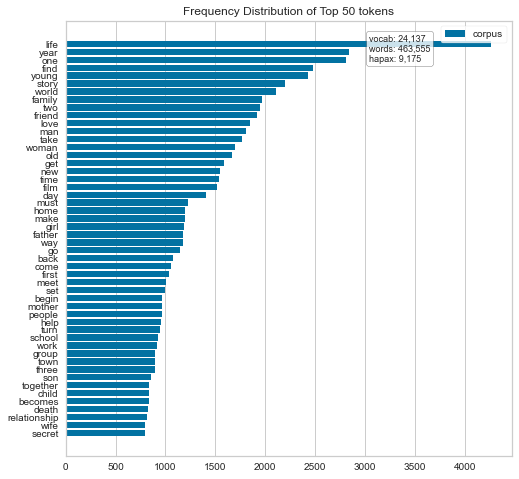

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [240]:
from yellowbrick.text.freqdist import FreqDistVisualizer 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Get all features (tokens)
features = vect3.get_feature_names_out()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n = 50)
visualizer.fit(bag_of_words3)
visualizer.poof()

In [241]:
X_train_v1,X_test,y_train_v1,y_test = train_test_split(bag_of_words3, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [242]:
X_train_v1.shape

(14142, 24137)

In [243]:
y_train_v1.value_counts()

0    7844
1    6298
Name: DramaGenre, dtype: int64

In [244]:
X_val.shape

(3536, 24137)

In [245]:
y_val.value_counts()

0    1961
1    1575
Name: DramaGenre, dtype: int64

In [246]:
X_test.shape

(4714, 24137)

In [247]:
y_test.value_counts()

0    2614
1    2100
Name: DramaGenre, dtype: int64

### Naive Bayes

In [248]:
start = time.time()

model_NB_base = MultinomialNB(alpha = 1.2)

model_NB_base.fit(X_train, y_train)
y_val_hat_NB_base = model_NB_base.predict(X_val)

end = time.time()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_val,y_val_hat_NB_base) * 100 

65.22284996861268

In [249]:
print(confusion_matrix(y_val,y_val_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_base) * 100)
print(precision_score(y_val,y_val_hat_NB_base) * 100)
print(f1_score(y_val,y_val_hat_NB_base) * 100)

[[1389  572]
 [ 536 1039]]
84.9801998868565
68.66515837104072
65.96825396825396
64.49410304158909
65.22284996861268


In [250]:
pred_nb_base_prob = model_NB_base.predict_proba(X_val)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(nb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.142, F-Score=0.68852


In [251]:
y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.142, 1, 0)

print(confusion_matrix(y_val, y_val_hat_NB_probs))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_NB_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_NB_probs) * 100)
print(precision_score(y_val,y_val_hat_NB_probs) * 100)
print(f1_score(y_val,y_val_hat_NB_probs) * 100)  #f1 65.88, 1753 rights

[[ 995  966]
 [ 241 1334]]
84.9801998868565
65.86538461538461
84.6984126984127
57.99999999999999
68.85161290322581


### Logistic Regression

In [524]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000)


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
#param_grid_LR = {'solver': ['saga'],                                             # attempt1 newton-cg
#                    'C': [int(x) for x in range(1,35,5)]}                             # Default 1.0
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [1, 0.1, 0.01, 0.2]}
param_grid_LR = {'solver': ['saga'],  
                    'C': [0.1],                                                         # attempt3 - 27
                'tol': [0.002, 0.004, 0.005, 0.001]}                         # default l2


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 0.1, 'solver': 'saga', 'tol': 0.002}
Best Cross Validation Score: 0.6897986574675566


In [525]:
total_time_LR

datetime.timedelta(seconds=1, microseconds=558084)

In [252]:
start = datetime.datetime.now()

model_LR_r3 = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 2000,
                                  C = 0.1,
                                  tol = 0.002,
                                  solver = 'saga')

model_LR_r3.fit(X_train, y_train)
y_val_hat_LR_r3 = model_LR_r3.predict(X_val)

end = datetime.datetime.now()
total_time_LR_r3 = end-start

y_train_hat_LR_r3 = model_LR_r3.predict(X_train)

f1_score(y_val,y_val_hat_LR_r3) * 100 

65.91048436541999

In [253]:
total_time_LR_r3

datetime.timedelta(microseconds=186490)

In [254]:
print(confusion_matrix(y_val, y_val_hat_LR_r3))
print(accuracy_score(y_train,y_train_hat_LR_r3, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_r3, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_r3) * 100)
print(precision_score(y_val,y_val_hat_LR_r3) * 100)
print(f1_score(y_val,y_val_hat_LR_r3) * 100)

[[1349  612]
 [ 500 1075]]
84.14105223458421
68.55203619909503
68.25396825396825
63.72258446947243
65.91048436541999


In [255]:
pred_lr_r3_prob = model_LR_r3.predict_proba(X_val)

lr_r3_prob_class1 = pred_lr_r3_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_r3_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.379, F-Score=0.68094


In [256]:
y_val_hat_lr_probs = np.where(lr_r3_prob_class1 >= 0.379, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_r3, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100)

[[ 979  982]
 [ 255 1320]]
84.14105223458421
65.01696832579185
83.80952380952381
57.34144222415291
68.09388702605106


### SGD CLassifier

In [533]:
from sklearn.linear_model import SGDClassifier

start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter=100000)


#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}    
param_grid_sgd = {'loss': ['log'],                                            
                   'alpha': [0.001,0.002,0.003, 0.01, 0.0001]}                             
#param_grid_sgd = {'loss': ['log'],                                             
#                    'alpha': [0.002],
#                     'epsilon': [0.1, 0.2, .3]
                     #'n_iter_no_change': [5,6,7,4]
#                 }                         


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train, y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 0.002, 'loss': 'log'}
Best Cross Validation Score: 0.6881956133557764


In [534]:
total_time_LR

datetime.timedelta(microseconds=932249)

In [257]:
start = time.time()

model_sgd_grid = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'log',
                             alpha = 0.002,
                              epsilon = 0.1)

model_sgd_grid.fit(X_train, y_train)
y_val_hat_sgd_grid = model_sgd_grid.predict(X_val)

end = time.time()
total_time_sgd_grid = end-start

y_train_hat_sgd_grid = model_sgd_grid.predict(X_train)

f1_score(y_val,y_val_hat_sgd_grid) * 100 

67.22638680659671

In [258]:
print(confusion_matrix(y_val, y_val_hat_sgd_grid))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_grid, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_grid) * 100)
print(precision_score(y_val,y_val_hat_sgd_grid) * 100)
print(f1_score(y_val,y_val_hat_sgd_grid) * 100)  #f1 65.88, 1753 rights

[[1322  639]
 [ 454 1121]]
80.49217424099567
69.0893665158371
71.17460317460318
63.69318181818182
67.22638680659671


In [259]:
pred_sgd_base_prob = model_sgd_grid.predict_proba(X_val)

sgd_base_prob_class1 = pred_sgd_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(sgd_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.421, F-Score=0.68266


In [260]:
y_val_hat_sgd_probs = np.where(sgd_base_prob_class1 >= 0.421, 1, 0)

print(confusion_matrix(y_val, y_val_hat_sgd_probs))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_probs) * 100)
print(precision_score(y_val,y_val_hat_sgd_probs) * 100)
print(f1_score(y_val,y_val_hat_sgd_probs) * 100)  #f1 65.88, 1753 rights

[[1010  951]
 [ 266 1309]]
80.49217424099567
65.58257918552036
83.11111111111111
57.92035398230089
68.26597131681879


#### Conclusion of POS taggin:

Can see good balance between precision and recall scores not talking f1 score.

Overall f1 score performances are lower than tfidf - the best performance so far at 70% (f1 score)

Best model in tag based analysis rounds 1 and 2 - SGD - more stable model

## Round 4 - Word Embedding

From the results of Tag based analysis we can see that word embeding might be a good option since there are words that repeated across genres and even on 1 tag genre movies - the performance is similar to earlier attempts of Count vectorizer and TF IDF.

Hence, word embeding might help find similar words to most frequent words and help differentiate the genres.

In [261]:
import tensorflow as tf
import tensorflow_hub as hub

#https://towardsdatascience.com/pre-trained-word-embedding-for-text-classification-end2end-approach-5fbf5cd8aead
#https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

Only special chars are removed for embedding purposes since it may be embeded to non meaningful word

In [262]:
#only remove special chars for word embedding since prebuild model is to be used and they are capable to distinguish 
#each word with meaning as well

def clean_text_vtensor(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis

    text = text.lower()
    
    return text

In [263]:
X = movie_story_dataset['story'].apply(clean_text_vtensor)
y = movie_story_dataset['DramaGenre']

X_train_v3,X_test,y_train_v3,y_test = train_test_split(X, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v3, y_train_v3, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v3)

In [264]:
neg, pos = np.bincount(movie_story_dataset['DramaGenre'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 18856
    Positive: 8398 (44.54% of total)



There are multiple prebuild embeding models from tensor and we decided to use universal sentence encoder from tensorflow.

THis encoder is trained for larger set and application of it generic and thus help us in this dataset.

Also, its the larget dimension one as well, with respect to the one from class - 50 dims.

In [265]:
#embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2")
#embed = hub.load("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2")

hub_layer = hub.KerasLayer(embed, output_shape=[], input_shape=[], dtype=tf.string)

#https://tfhub.dev/google/universal-sentence-encoder/4
#https://www.tensorflow.org/hub/tutorials/tf2_text_classification

In [266]:
hub_layer(X_train)

<tf.Tensor: shape=(10606, 512), dtype=float32, numpy=
array([[-0.01927947, -0.05437264, -0.04612953, ..., -0.05251617,
         0.05434059, -0.06613255],
       [ 0.00314772, -0.03670159, -0.06933738, ...,  0.045768  ,
         0.07829134, -0.02397637],
       [-0.02658127, -0.00694743, -0.00281204, ..., -0.04660859,
        -0.02528357,  0.0583846 ],
       ...,
       [ 0.03226659, -0.03403543, -0.04678709, ..., -0.00336887,
         0.02644808,  0.0695853 ],
       [ 0.02244115, -0.02483299, -0.07172721, ..., -0.01510369,
        -0.01925493, -0.06987033],
       [-0.03197786, -0.06564993, -0.04794344, ..., -0.00813842,
        -0.00642307,  0.06009704]], dtype=float32)>

### MLP from tensorflow

In [267]:
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation = tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU()))
#model.add(tf.keras.layers.Dropout(0.2)) #.5
model.add(tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer = output_bias))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 256,831,713
Trainable params: 33,889
Non-trainable params: 256,797,824
_________________________________________________________________


In [268]:
METRICS = [
      tf.metrics.TruePositives(name='tp'),
      tf.metrics.FalsePositives(name='fp'),
      tf.metrics.TrueNegatives(name='tn'),
      tf.metrics.FalseNegatives(name='fn'), 
      tf.metrics.BinaryAccuracy(name='accuracy'),
      tf.metrics.Precision(name='precision'),
      tf.metrics.Recall(name='recall'),
      tf.metrics.AUC(name='auc'),
      tf.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = tf.losses.BinaryCrossentropy(),
              metrics = METRICS)
              #metrics = [tf.metrics.BinaryAccuracy('f1_score')])
    
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [269]:
#model._estimator_type = "classifier"

In [270]:
history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    batch_size = 1000,
                    #validation_split = 0.15,
                    validation_data = (X_val, y_val),
                    verbose = 1,
                    callbacks=[early_stopping])

Epoch 1/50
11/11 [==============================] - 14s 716ms/step - loss: 0.6186 - tp: 2507.0000 - fp: 1370.0000 - tn: 4513.0000 - fn: 2216.0000 - accuracy: 0.6619 - precision: 0.6466 - recall: 0.5308 - auc: 0.7105 - prc: 0.6480 - val_loss: 0.5793 - val_tp: 1118.0000 - val_fp: 634.0000 - val_tn: 1327.0000 - val_fn: 457.0000 - val_accuracy: 0.6915 - val_precision: 0.6381 - val_recall: 0.7098 - val_auc: 0.7661 - val_prc: 0.7060
Epoch 2/50
11/11 [==============================] - 5s 482ms/step - loss: 0.5613 - tp: 3139.0000 - fp: 1513.0000 - tn: 4370.0000 - fn: 1584.0000 - accuracy: 0.7080 - precision: 0.6748 - recall: 0.6646 - auc: 0.7768 - prc: 0.7232 - val_loss: 0.5659 - val_tp: 968.0000 - val_fp: 472.0000 - val_tn: 1489.0000 - val_fn: 607.0000 - val_accuracy: 0.6949 - val_precision: 0.6722 - val_recall: 0.6146 - val_auc: 0.7708 - val_prc: 0.7073
Epoch 3/50
11/11 [==============================] - 5s 423ms/step - loss: 0.5492 - tp: 3151.0000 - fp: 1480.0000 - tn: 4403.0000 - fn: 1572.

training time is less than 4 minutes

In [271]:
results = model.evaluate(X_val, y_val) #[0.5689365267753601, 0.7102248668670654],
print(results)

111/111 [==============================] - 3s 23ms/step - loss: 0.5662 - tp: 1056.0000 - fp: 511.0000 - tn: 1450.0000 - fn: 519.0000 - accuracy: 0.7087 - precision: 0.6739 - recall: 0.6705 - auc: 0.7852 - prc: 0.7161
[0.5662120580673218, 1056.0, 511.0, 1450.0, 519.0, 0.7087104320526123, 0.6738991737365723, 0.6704761981964111, 0.7852242588996887, 0.7161034941673279]


In [272]:

#tf.keras.models.save_model(model,'word2vec_V4_71880_model')

#model_check = tf.keras.models.load_model('word2vec_V4_71880_model')

In [275]:
results = model.predict(X_val)
results_train = model.predict(X_train)

# def to_labels(pos_probs, threshold):
#     return (pos_probs >= threshold).astype('int')


# thresholds = arange(0, 1, 0.001)
# # evaluate each threshold
# scores = [f1_score(y_val, to_labels(results, t)) for t in thresholds]
# # get best threshold
# ix = argmax(scores)
# print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

In [276]:
y_val_hat_nn_probs = np.where(results >= 0.304, 1, 0)
y_train_hat_nn_probs = np.where(results_train >= 0.50, 1, 0)

print(confusion_matrix(y_val, y_val_hat_nn_probs))
print(accuracy_score(y_train,y_train_hat_nn_probs, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_nn_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_nn_probs) * 100)
print(precision_score(y_val,y_val_hat_nn_probs) * 100)
print(f1_score(y_val,y_val_hat_nn_probs) * 100)  #f1 65.88, 1753 rights

[[1252  709]
 [ 334 1241]]
77.15444088251932
70.50339366515837
78.7936507936508
63.64102564102564
70.41134751773049


### XG boost

In [277]:
X_train_embed = hub_layer(X_train) # use hublayer to change any data to embeded format
X_val_embed = hub_layer(X_val)

In [278]:
from xgboost import XGBClassifier
import datetime

#!pip install --upgrade xgboost

In [432]:
start = datetime.datetime.now()

model_xgb = XGBClassifier(random_state = 0, eval_metric = 'aucpr', scale_pos_weight = 1.22, use_label_encoder = False)


#param_grid_xgb = {'n_estimators': [int(x) for x in range(300,420,10)]}        
#param_grid_xgb = {'n_estimators': [int(x) for x in range(350,600,50)],                                            
#                    'max_depth': [int(x) for x in range(10,20,2)]}                            
param_grid_xgb = {'n_estimators': [450],                                            
                 'max_depth': [14],
                 'learning_rate': [0.09],
                 'gamma': [0.001],                                             
                 'min_child_weight': [1],
                 'subsample': [0.7],                                        #np.arange(0.5, 1.0, 0.1)
                 'colsample_bytree': [0.8],
                 'reg_alpha': [1e-7],
                 'reg_lambda': [1e-5, 1e-4, 1e-6, 1e-3]
                 }   


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv = cv, scoring = 'f1_micro')
grid_xgb.fit(X_train_embed.numpy(), y_train)

end = datetime.datetime.now()
total_time_xgb = end-start

print("Best Parameter: {}".format(grid_xgb.best_params_))
print("Best Cross Validation Score: {}".format(grid_xgb.best_score_))

#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

Best Parameter: {'colsample_bytree': 0.8, 'gamma': 0.001, 'learning_rate': 0.09, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 450, 'reg_alpha': 1e-07, 'reg_lambda': 1e-05, 'subsample': 0.7}
Best Cross Validation Score: 0.7021506812930808


In [459]:
total_time_xgb

datetime.timedelta(seconds=331, microseconds=740469)

In [279]:
start = datetime.datetime.now()

model_xgb = XGBClassifier(random_state = 0, eval_metric = 'logloss', scale_pos_weight = 1.22, use_label_encoder = False,
                          n_estimators = 450,
                          max_depth = 12,
                          learning_rate = 0.009,
                          gamma = 0.001,
                          min_child_weight = 1,
                          subsample = 0.7,
                          colsample_bytree = 0.8,
                          reg_alpha = 1e-7,
                          reg_lambda = 1e-05
                         )

model_xgb.fit(X_train_embed.numpy(), y_train)

y_val_hat_xgb_base = model_xgb.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_xgb_base = end-start

y_train_hat_xgb_base = model_xgb.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_xgb_base) * 100 

65.6188605108055

In [280]:
total_time_xgb_base

datetime.timedelta(seconds=73, microseconds=947005)

In [281]:
print(confusion_matrix(y_val, y_val_hat_xgb_base))
print(accuracy_score(y_train,y_train_hat_xgb_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_xgb_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_xgb_base) * 100)
print(precision_score(y_val,y_val_hat_xgb_base) * 100)
print(f1_score(y_val,y_val_hat_xgb_base) * 100)

[[1484  477]
 [ 573 1002]]
100.0
70.30542986425338
63.61904761904762
67.74847870182555
65.6188605108055


In [282]:
pred_xgb_base_prob =  model_xgb.predict_proba(X_val_embed.numpy())

xgb_base_prob_class1 = pred_xgb_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(xgb_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.332, F-Score=0.70398


In [284]:
y_val_hat_xgb_probs = np.where(xgb_base_prob_class1 >= 0.332, 1, 0)

print(confusion_matrix(y_val, y_val_hat_xgb_probs))
print(accuracy_score(y_train,y_train_hat_xgb_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_xgb_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_xgb_probs) * 100)
print(precision_score(y_val,y_val_hat_xgb_probs) * 100)
print(f1_score(y_val,y_val_hat_xgb_probs) * 100)

[[1093  868]
 [ 248 1327]]
100.0
68.43891402714932
84.25396825396825
60.45558086560364
70.39787798408489


Overfitting issues - not stable

### SGD

In [423]:

start = datetime.datetime.now()

model_sgd = SGDClassifier(random_state = 0, class_weight = 'balanced', max_iter=10000)

#param_grid_sgd = {'loss': ['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_error',
#                            'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}        # Default lbfgs
param_grid_sgd = {'loss': ['hinge'],                                             # attempt1 newton-cg
                    'alpha': [0.0001,0.00009, 0.0004, 0.00008]}                             # Default 1.0
#param_grid_sgd = {'loss': ['hinge'],                                             # attempt1 newton-cg
#                    'alpha': [0.0004],
#                     'epsilon': [0.1, 0.09, 0.2]
#                     #'n_iter_no_change': [5,6,7,4]
#                 }                          # attemp2 - 31


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_sgd = GridSearchCV(model_sgd, param_grid_sgd, cv = cv, scoring = 'f1_micro')
grid_sgd.fit(X_train_embed.numpy(), y_train)

end = datetime.datetime.now()
total_time_sgd = end-start

print("Best Parameter: {}".format(grid_sgd.best_params_))
print("Best Cross Validation Score: {}".format(grid_sgd.best_score_))

Best Parameter: {'alpha': 0.0001, 'loss': 'hinge'}
Best Cross Validation Score: 0.7020561461446727


In [285]:
start = time.time()

model_sgd_grid = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'hinge',
                             alpha = 0.0001)

model_sgd_grid.fit(X_train_embed.numpy(), y_train)
y_val_hat_sgd_grid = model_sgd_grid.predict(X_val_embed.numpy())

end = time.time()
total_time_sgd_grid = end-start

y_train_hat_sgd_grid = model_sgd_grid.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_sgd_grid) * 100 

69.45464820570784

In [286]:
total_time_sgd_grid

0.6810996532440186

In [287]:
print(confusion_matrix(y_val, y_val_hat_sgd_grid))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_sgd_grid, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_sgd_grid) * 100)
print(precision_score(y_val,y_val_hat_sgd_grid) * 100)
print(f1_score(y_val,y_val_hat_sgd_grid) * 100)  

[[1226  735]
 [ 346 1229]]
71.43126532151612
69.4287330316742
78.03174603174602
62.57637474541752
69.45464820570784


Highly stable, good classificatioin on class of interest and f1 score slighlt below 70% (we achieved earlier)

### SVM

In [441]:
start = datetime.datetime.now()

model_svm = SVC(random_state = 0, class_weight = 'balanced')

#param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}        # Default lbfgs
#param_grid_svm = {'kernel': ['poly'],                                             # attempt1 newton-cg
#                    'degree': [3, 4, 5, 2, 6, 7]}                             # Default 1.0
param_grid_svm = {'kernel': ['poly'],                                             # attempt1 newton-cg
                    'degree': [4],
                     'C': [0.9, 1, 0.8],
                 'tol': [0.01, 0.001, 0.1]
                 }                          # attemp2 - 31


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_svm = GridSearchCV(model_svm, param_grid_svm, cv = cv, scoring = 'f1_micro')
grid_svm.fit(X_train_embed.numpy(), y_train)

end = datetime.datetime.now()
total_time_svm = end-start

print("Best Parameter: {}".format(grid_svm.best_params_))
print("Best Cross Validation Score: {}".format(grid_svm.best_score_))

Best Parameter: {'C': 0.9, 'degree': 4, 'kernel': 'poly', 'tol': 0.01}
Best Cross Validation Score: 0.7152562129192881


In [485]:
total_time_svm

datetime.timedelta(seconds=326, microseconds=11914)

In [288]:
start = datetime.datetime.now()

model_SVC_base = SVC( class_weight = 'balanced', random_state = 0,
                     kernel = 'poly',
                     degree = 4,
                     C = 0.9,
                     tol = 0.01,
                     probability = True)
model_SVC_base.fit(X_train_embed.numpy(), y_train)

y_val_hat_svc_base = model_SVC_base.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_svc_base = end-start

y_train_hat_svc_base = model_SVC_base.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_svc_base) * 100 

67.81389420012746

In [289]:
total_time_svc_base

datetime.timedelta(seconds=337, microseconds=170382)

In [290]:
print(confusion_matrix(y_val, y_val_hat_svc_base))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svc_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svc_base) * 100)
print(precision_score(y_val,y_val_hat_svc_base) * 100)
print(f1_score(y_val,y_val_hat_svc_base) * 100)  #f1 65.88, 1753 rights

[[1462  499]
 [ 511 1064]]
97.62398642277957
71.43665158371041
67.55555555555556
68.07421625079975
67.81389420012746


In [291]:
pred_svm_base_prob = model_SVC_base.predict_proba(X_val_embed.numpy())

svm_base_prob_class1 = pred_svm_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(svm_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.367, F-Score=0.71373


In [292]:
y_val_hat_svm_probs = np.where(svm_base_prob_class1 >= 0.367, 1, 0)

print(confusion_matrix(y_val, y_val_hat_svm_probs))
print(accuracy_score(y_train,y_train_hat_svc_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_svm_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_svm_probs) * 100)
print(precision_score(y_val,y_val_hat_svm_probs) * 100)
print(f1_score(y_val,y_val_hat_svm_probs) * 100)

[[1222  739]
 [ 291 1284]]
97.62398642277957
70.8710407239819
81.52380952380952
63.47009391992091
71.37298499166204


### Logistic Regression

In [513]:
start = datetime.datetime.now()

model_LR = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 1000)


#param_grid_LR = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}        # Default lbfgs
#param_grid_LR = {'solver': ['lbfgs'],                                                  # attempt1 newton-cg
#                   'C': [int(x) for x in range(1,20,2)]}                             # Default 1.0
#param_grid_LR = {'solver': ['lbfgs'],  
#                    'C': [2, 3, 4]}
#param_grid_LR = {'solver': ['saga'],  
#                    'C': [1, 0.1, 0.2, 0.15, 0.095]}
param_grid_LR = {'solver': ['lbfgs'],  
                   'C': [3],                                                         # attempt3 - 27
                'tol': [0.0001, 0.0002, 0.00009, 0.001],
#                'penalty': ['l1', 'l2']
                }                                 # default l2


cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

grid_LR = GridSearchCV(model_LR, param_grid_LR, cv = cv, scoring = 'f1_micro')
grid_LR.fit(X_train_embed.numpy(), y_train)

end = datetime.datetime.now()
total_time_LR = end-start

print("Best Parameter: {}".format(grid_LR.best_params_))
print("Best Cross Validation Score: {}".format(grid_LR.best_score_))

Best Parameter: {'C': 3, 'solver': 'lbfgs', 'tol': 0.0001}
Best Cross Validation Score: 0.7029994442559965


In [293]:
start = datetime.datetime.now()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced', max_iter = 1000,
                                  C = 3,
                                  #tol = 0.0001,
                                  solver = 'lbfgs')

model_LR_base.fit(X_train_embed.numpy(), y_train)
y_val_hat_LR_base = model_LR_base.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_LR_base) * 100 

68.29562594268477

In [294]:
total_time_LR_base

datetime.timedelta(seconds=1, microseconds=843613)

In [295]:
print(confusion_matrix(y_val, y_val_hat_LR_base))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_LR_base, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_LR_base) * 100)
print(precision_score(y_val,y_val_hat_LR_base) * 100)
print(f1_score(y_val,y_val_hat_LR_base) * 100)

[[1353  608]
 [ 443 1132]]
72.61927211012635
70.27714932126696
71.87301587301587
65.05747126436782
68.29562594268477


In [296]:
pred_lr_base_prob = model_LR_base.predict_proba(X_val_embed.numpy())

lr_base_prob_class1 = pred_lr_base_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')


thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(lr_base_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold=0.365, F-Score=0.70261


In [297]:
y_val_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.365, 1, 0)

print(confusion_matrix(y_val, y_val_hat_lr_probs))
print(accuracy_score(y_train,y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_lr_probs) * 100)
print(precision_score(y_val,y_val_hat_lr_probs) * 100)
print(f1_score(y_val,y_val_hat_lr_probs) * 100)

[[1021  940]
 [ 213 1362]]
72.61927211012635
67.39253393665159
86.47619047619047
59.16594265855778
70.26051070415271


#### Conclusion of - MLP Tensorflow, XG Boost, SGD and Logistic

MLP has defintely performed well, and since this is a smaller size data, we may find better performances on larger data.

XG boost was a try, along with SVM - both has issues of overfitting.

SGD and logistic are good good performing models overall and are also very stable.

#### Next?

We try to combine models to predict - since they are performing fairly well. Could bring down overfitting by combining with stable models.

### Stacking Models - SVM and Logistic

In [298]:
from sklearn.ensemble import VotingClassifier

#https://machinelearningmastery.com/voting-ensembles-with-python/#:~:text=In%20classification%2C%20a%20hard%20voting,with%20the%20largest%20sum%20probability.

In [299]:
models = list()
models.append(('Logistic - Balanced', model_LR_base))
models.append(('SVM - Balanced', model_SVC_base))

In [300]:
start = datetime.datetime.now()

# define the hard voting ensemble
ensemble = VotingClassifier(estimators = models, voting = 'soft')
ensemble.fit(X_train_embed.numpy(), y_train)

y_val_hat_ensemble = ensemble.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_ensemble = end-start

y_train_hat_ensemble = ensemble.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_ensemble) * 100 

67.69716088328074

In [301]:
total_time_ensemble

datetime.timedelta(seconds=334, microseconds=639825)

In [302]:
print(confusion_matrix(y_val, y_val_hat_ensemble))
print(accuracy_score(y_train,y_train_hat_ensemble, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_ensemble, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_ensemble) * 100)
print(precision_score(y_val,y_val_hat_ensemble) * 100)
print(f1_score(y_val,y_val_hat_ensemble) * 100)  #f1 65.88, 1753 rights

[[1439  522]
 [ 502 1073]]
92.1648123703564
71.04072398190046
68.12698412698413
67.27272727272727
67.69716088328074


In [303]:
pred_ensemeble_prob = ensemble.predict_proba(X_val_embed.numpy())

ensemble_prob_class1 = pred_ensemeble_prob[:,1]

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(ensemble_prob_class1, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.334, F-Score=0.71220


In [304]:
y_val_hat_ensemble_probs = np.where(ensemble_prob_class1 >= 0.334, 1, 0)

print(confusion_matrix(y_val, y_val_hat_ensemble_probs))
print(accuracy_score(y_train,y_train_hat_ensemble, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_ensemble_probs, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_ensemble_probs) * 100)
print(precision_score(y_val,y_val_hat_ensemble_probs) * 100)
print(f1_score(y_val,y_val_hat_ensemble_probs) * 100)

[[1019  942]
 [ 183 1392]]
92.1648123703564
68.18438914027149
88.38095238095238
59.6401028277635
71.22026093630085


### Stacking Models - SVM, Logistic and SGD

In [305]:
models2 = list()
models2.append(('Logistic - Balanced', model_LR_base))
models2.append(('SVM - Balanced', model_SVC_base))
models2.append(('SGD - Recall', model_sgd_grid))

In [306]:
start = datetime.datetime.now()

# define the hard voting ensemble
ensemble2 = VotingClassifier(estimators = models2, voting = 'hard')
ensemble2.fit(X_train_embed.numpy(), y_train)

y_val_hat_ensemble2 = ensemble2.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_ensemble = end-start

y_train_hat_ensemble2 = ensemble2.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_ensemble2) * 100 

69.49352179034159

In [307]:
total_time_ensemble

datetime.timedelta(seconds=315, microseconds=434174)

In [308]:
print(confusion_matrix(y_val, y_val_hat_ensemble2))
print(accuracy_score(y_train,y_train_hat_ensemble2, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_ensemble2, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_ensemble2) * 100)
print(precision_score(y_val,y_val_hat_ensemble2) * 100)
print(f1_score(y_val,y_val_hat_ensemble2) * 100)

[[1320  641]
 [ 395 1180]]
75.28757307184613
70.70135746606336
74.92063492063492
64.79956068094454
69.49352179034159


### Stacking Models - SGD, Logistic

In [309]:
models3 = list()
models3.append(('Logistic - Balanced', model_LR_base))
models3.append(('SGD - Recall', model_sgd_grid))

In [310]:
start = datetime.datetime.now()

# define the hard voting ensemble
ensemble3 = VotingClassifier(estimators = models3, voting = 'hard')
ensemble3.fit(X_train_embed.numpy(), y_train)

y_val_hat_ensemble3 = ensemble3.predict(X_val_embed.numpy())

end = datetime.datetime.now()
total_time_ensemble = end-start

y_train_hat_ensemble3 = ensemble3.predict(X_train_embed.numpy())

f1_score(y_val,y_val_hat_ensemble3) * 100 

68.2764865680652

In [311]:
total_time_ensemble

datetime.timedelta(seconds=2, microseconds=263167)

In [312]:
print(confusion_matrix(y_val, y_val_hat_ensemble3))
print(accuracy_score(y_train,y_train_hat_ensemble3, normalize = True) * 100)
print(accuracy_score(y_val,y_val_hat_ensemble3, normalize = True) * 100)
print(recall_score(y_val,y_val_hat_ensemble3) * 100)
print(precision_score(y_val,y_val_hat_ensemble3) * 100)
print(f1_score(y_val,y_val_hat_ensemble3) * 100)

[[1354  607]
 [ 444 1131]]
72.64755798604563
70.27714932126696
71.80952380952381
65.07479861910241
68.2764865680652


#### Conclusions of Embedding

Did try models - MLP tensor(best), SVM, XGB, SGD, Logistic

SVM and XGB overfit the emebedded input

SGD and logistic are very stable and decent f1 score

Best model - MLP tensorflow - stable and good f1-score at threshold 0.372

#### Voting classifier

We try to ensemble the models together for predictions (trials)

Overfitting of SVM was handled by combining with SGD and LR.

All ensembled models performed well.


#### Next

Conclude training phase.

Getting into test part of data for prediction based on based models from CV, TFIDF, tag analysis and Embedding

## Best Models

### CountVectorizer - SGD

Of both round of CountVectorizer best model - Multinomial NB from round 2.

Expected to perform well on CV since it works well with count values.

stable and max f1 score.

In [313]:
def clean_text_v2(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",text)  #needs further analysis

    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    #convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
    
    #lemmatization
    #text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [314]:
movie_story_dataset['CleanText_cv2'] = movie_story_dataset['story'].apply(clean_text_v2)

X = movie_story_dataset['CleanText_cv2']
y = movie_story_dataset['DramaGenre']

In [315]:
vect2 = CountVectorizer(ngram_range = (1,2),
                       analyzer = 'word',
                       #max_df = 0.4,
                        max_features = 10000,
                       min_df = 1e-05,
                        binary = True
                      )
vect2.fit(X)
bag_of_words2 = vect2.transform(X)

In [316]:
X_train_v1,X_test,y_train_v1,y_test = train_test_split(bag_of_words2, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [317]:
start = time.time()

model_NB_base = MultinomialNB(alpha = 1)

model_NB_base.fit(X_train, y_train)
y_test_hat_NB_base = model_NB_base.predict(X_test)

end = time.time()

total_time_NB_pred = end-start

y_train_hat_NB_base = model_NB_base.predict(X_train)

f1_score(y_test,y_test_hat_NB_base) * 100 

68.18804198995892

In [318]:
pred_nb_base_prob = model_NB_base.predict_proba(X_test)

nb_base_prob_class1 = pred_nb_base_prob[:,1]

y_val_hat_NB_probs = np.where(nb_base_prob_class1 >= 0.145, 1, 0)

print(confusion_matrix(y_test, y_test_hat_NB_base))
print(accuracy_score(y_train,y_train_hat_NB_base, normalize = True) * 100)
print(accuracy_score(y_test,y_test_hat_NB_base, normalize = True) * 100)
print(recall_score(y_test,y_test_hat_NB_base) * 100)
print(precision_score(y_test,y_test_hat_NB_base) * 100)
print(f1_score(y_test,y_test_hat_NB_base) * 100)  #f1 65.88, 1753 rights

[[1826  788]
 [ 606 1494]]
81.25589289081651
70.42851081883751
71.14285714285714
65.46888694127958
68.18804198995892


### TFIDF - Logistic Regression

Under TFIDF (2 rounds included) - best model is Logistic from round 2 of tfidf.

Stable and good f1 score.

In [319]:
def clean_text_v4(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    
    text = re.sub("[-]"," ",text)
    #text = re.sub("[0-9]"," ",text)
    text = re.sub("[^a-zA-Z0-9 ]"," ",text)
    
    # convert text to lowercase 
    text = text.lower()
    
    #removing stopwords
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    #stemming
    text = ' '.join([porter.stem(word) for word in text.split()])
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [320]:
movie_story_dataset['CleanText_tfidf2'] = movie_story_dataset['story'].apply(clean_text_v4)

X = movie_story_dataset['CleanText_tfidf2']
y = movie_story_dataset['DramaGenre']

In [321]:
custom_vec_v2 = TfidfVectorizer(analyzer='char_wb',
                                #strip_accents = 'ascii',
                                #stop_words = 'english',
                                max_df = .41,
                                min_df= .001,
                                use_idf = True,
                                smooth_idf = False,
                                sublinear_tf = True,
                                #tokenizer = lambda x: x.split(),
                                ngram_range=(2, 6))

X_vectorized_v2 = custom_vec_v2.fit_transform(X)
X_vectorized_v2.shape 

(18856, 36996)

In [322]:
X_train_v2,X_test,y_train_v2,y_test = train_test_split(X_vectorized_v2, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v2, y_train_v2, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v2)

In [323]:
start = datetime.datetime.now()

model_LR_base = LogisticRegression(random_state = 0, class_weight = 'balanced',
                                  C = 0.6,
                                  solver = 'newton-cg')

model_LR_base.fit(X_train, y_train)
y_test_hat_LR_base = model_LR_base.predict(X_test)

end = datetime.datetime.now()
total_time_LR_base = end-start

y_train_hat_LR_base = model_LR_base.predict(X_train)

f1_score(y_test,y_test_hat_LR_base) * 100 

66.45220588235294

In [324]:
pred_lr_base_prob = model_LR_base.predict_proba(X_test)

lr_base_prob_class1 = pred_lr_base_prob[:,1]

y_test_hat_lr_probs = np.where(lr_base_prob_class1 >= 0.446, 1, 0)

print(confusion_matrix(y_test, y_test_hat_lr_probs))
print(accuracy_score(y_train, y_train_hat_LR_base, normalize = True) * 100)
print(accuracy_score(y_test,y_test_hat_lr_probs, normalize = True) * 100)
print(recall_score(y_test,y_test_hat_lr_probs) * 100)
print(precision_score(y_test,y_test_hat_lr_probs) * 100)
print(f1_score(y_test,y_test_hat_lr_probs) * 100) 

[[1562 1052]
 [ 448 1652]]
79.19102394870828
68.17988969028426
78.66666666666666
61.094674556213015
68.77601998334721


### POS Tagging

Best model under tag analysis is from POS - SGD, very stable and good f1 score

In [325]:
def clean_text_v6(text):
    
    text = ' '.join([re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",word) for word in text.split()])
    text = ' '.join([re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}"," ",word) for word in text.split()])
    
    text = re.sub(r'[-]', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)

    tagged_sentence = nltk.tag.pos_tag(text.split())
    edited_sentence = ' '.join([word for word,tag in tagged_sentence if tag != 'NNP'])
    
    #convert text to lowercase 
    text = edited_sentence.lower()
    
    
    text = ' '.join([word for word in text.split() if word not in (stop_words) and (len(word) != 1) ])
    
    #lemmatization
    text = ' '.join([Lemmatizer.lemmatize(word) for word in text.split()])
    
    #stemming
    #text = ' '.join([porter.stem(word) for word in text.split()])
        
    return text


In [326]:
movie_story_dataset['CleanTextPOS'] = movie_story_dataset['story'].apply(clean_text_v6)

X = movie_story_dataset['CleanTextPOS']
y = movie_story_dataset['DramaGenre']

In [327]:

vect3 = CountVectorizer(ngram_range = (1,1),
                       analyzer = 'word',
                       max_df = 0.5,
                       min_df = 1e-05,
                        binary = True
                      )
vect3.fit(X)
bag_of_words3 = vect3.transform(X)

In [328]:
X_train_v1,X_test,y_train_v1,y_test = train_test_split(bag_of_words3, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v1, y_train_v1, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v1)

In [329]:
start = time.time()

model_sgd_grid = SGDClassifier(random_state = 0, class_weight = 'balanced',
                             loss = 'log',
                             alpha = 0.002,
                              epsilon = 0.1)

model_sgd_grid.fit(X_train, y_train)
y_test_hat_sgd_grid = model_sgd_grid.predict(X_test)

end = time.time()
total_time_sgd_grid = end-start

y_train_hat_sgd_grid = model_sgd_grid.predict(X_train)

f1_score(y_test,y_test_hat_sgd_grid) * 100 

67.19207385723935

In [330]:
pred_sgd_base_prob = model_sgd_grid.predict_proba(X_test)

sgd_base_prob_class1 = pred_sgd_base_prob[:,1]

y_test_hat_sgd_probs = np.where(sgd_base_prob_class1 >= 0.421, 1, 0)

print(confusion_matrix(y_test, y_test_hat_sgd_probs))
print(accuracy_score(y_train,y_train_hat_sgd_grid, normalize = True) * 100)
print(accuracy_score(y_test,y_test_hat_sgd_probs, normalize = True) * 100)
print(recall_score(y_test,y_test_hat_sgd_probs) * 100)
print(precision_score(y_test,y_test_hat_sgd_probs) * 100)
print(f1_score(y_test,y_test_hat_sgd_probs) * 100)  #f1 65.88, 1753 rights

[[1363 1251]
 [ 329 1771]]
80.49217424099567
66.48281714043274
84.33333333333334
58.6035737921906
69.15267473643108


### Sentence Embedding

Under sentence embedding - mutliple models performed well but MLP seems to have good potential for improvment since data used for training is smaller than actual given - 20k.

And model so far is stable due to early stopping, and good matching f1 score results to others so far.

In [331]:
import tensorflow as tf

In [332]:
def clean_text_vtensor(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis

    text = text.lower()
    
    return text

In [333]:
X = movie_story_dataset['story'].apply(clean_text_vtensor)
y = movie_story_dataset['DramaGenre']

X_train_v3,X_test,y_train_v3,y_test = train_test_split(X, y, test_size = 0.25, 
                                               random_state = 0, stratify = y)
X_train,X_val,y_train,y_val = train_test_split(X_train_v3, y_train_v3, test_size = 0.25, 
                                               random_state = 0, stratify = y_train_v3)

In [334]:
best_model_wordembed = tf.keras.models.load_model('word2vec_V4_71880_model')

In [335]:
results_test = best_model_wordembed.predict(X_test)
results_train = best_model_wordembed.predict(X_train)

In [336]:
y_test_hat_nn_probs = np.where(results_test >= 0.304, 1, 0)
y_train_hat_nn_probs = np.where(results_train >= 0.50, 1, 0)

print(confusion_matrix(y_test, y_test_hat_nn_probs))
print(accuracy_score(y_train,y_train_hat_nn_probs, normalize = True) * 100)
print(accuracy_score(y_test,y_test_hat_nn_probs, normalize = True) * 100)
print(recall_score(y_test,y_test_hat_nn_probs) * 100)
print(precision_score(y_test,y_test_hat_nn_probs) * 100)
print(f1_score(y_test,y_test_hat_nn_probs) * 100)  #f1 65.88, 1753 rights

[[1613 1001]
 [ 366 1734]]
74.13728078446162
71.00127280441238
82.57142857142857
63.40036563071298
71.72699069286455


In [337]:
#tf.keras.models.save_model(model,'word2vec_V4_71880_model') # -  193 FN 824 FP

#model_check = tf.keras.models.load_model('word2vec_V4_71880_model')

#### Conclusions from Best models so far

MLP seems to be the best - the results are quite evident in terms of f1 score and in-sam/out-sam difference is also minimal

#### Next

We preprocess evaluation data similar to train and run the best model with full training size fit (18k)

# Step 5, 6, 7

## Best of Best

#### Preparing evaluation set preprocess and model fitting on full data training - 18k

In [338]:
def clean_text_vtensor(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis

    text = text.lower()
    
    return text

In [339]:
X = movie_story_dataset['story'].apply(clean_text_vtensor)
y = movie_story_dataset['DramaGenre']

In [340]:
initial_bias = np.log([pos/neg])
output_bias = tf.keras.initializers.Constant(initial_bias)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(64, activation = tf.keras.layers.LeakyReLU()))
model.add(tf.keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU()))
#model.add(tf.keras.layers.Dropout(0.2)) #.5
model.add(tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer = output_bias))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_3 (Dense)             (None, 64)                32832     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 256,831,713
Trainable params: 33,889
Non-trainable params: 256,797,824
_________________________________________________________________


In [341]:
METRICS = [
      tf.metrics.TruePositives(name='tp'),
      tf.metrics.FalsePositives(name='fp'),
      tf.metrics.TrueNegatives(name='tn'),
      tf.metrics.FalseNegatives(name='fn'), 
      tf.metrics.BinaryAccuracy(name='accuracy'),
      tf.metrics.Precision(name='precision'),
      tf.metrics.Recall(name='recall'),
      tf.metrics.AUC(name='auc'),
      tf.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = tf.losses.BinaryCrossentropy(),
              metrics = METRICS)
              #metrics = [tf.metrics.BinaryAccuracy('f1_score')])
    
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [342]:
history_best = model.fit(X,
                    y,
                    epochs = 50,
                    batch_size = 1000,
                    validation_split = 0.15,
                    #validation_data = (X_val, y_val),
                    verbose = 1,
                    callbacks=[early_stopping])

Epoch 1/50
17/17 [==============================] - 12s 540ms/step - loss: 0.6021 - tp: 3910.0000 - fp: 2014.0000 - tn: 6902.0000 - fn: 3201.0000 - accuracy: 0.6746 - precision: 0.6600 - recall: 0.5499 - auc: 0.7303 - prc: 0.6707 - val_loss: 0.5900 - val_tp: 1023.0000 - val_fp: 630.0000 - val_tn: 912.0000 - val_fn: 264.0000 - val_accuracy: 0.6840 - val_precision: 0.6189 - val_recall: 0.7949 - val_auc: 0.7645 - val_prc: 0.7128
Epoch 2/50
17/17 [==============================] - 7s 389ms/step - loss: 0.5689 - tp: 4871.0000 - fp: 2593.0000 - tn: 6323.0000 - fn: 2240.0000 - accuracy: 0.6984 - precision: 0.6526 - recall: 0.6850 - auc: 0.7687 - prc: 0.7083 - val_loss: 0.5818 - val_tp: 669.0000 - val_fp: 291.0000 - val_tn: 1251.0000 - val_fn: 618.0000 - val_accuracy: 0.6787 - val_precision: 0.6969 - val_recall: 0.5198 - val_auc: 0.7669 - val_prc: 0.7140
Epoch 3/50
17/17 [==============================] - 6s 383ms/step - loss: 0.5522 - tp: 4508.0000 - fp: 2046.0000 - tn: 6870.0000 - fn: 2603.0

In [343]:
#tf.keras.models.save_model(model,'word2vec_V4_test_7127_model') # -  193 FN 824 FP

#the cuttoff for this model is at 0.375 since its fit on complete dataset and a validation split is provided to improve on

model_fullfit_check = tf.keras.models.load_model('word2vec_V4_test_7127_model')

In [344]:
movie_evaluation_dataset = pd.merge(evaluation_dataset, movies_dataset, left_on= 'movie_id', right_on = 'movieId')
movie_evaluation_dataset.drop('movieId', inplace=True, axis = 1)
movie_evaluation_dataset

movie_id                                              story  \
0       122349  Growing up in the Mission district of San Fran...   
1       122351  A soldier returns home from the Iraq war only ...   
2       122361  Marco the Monkey works as a beach officer. But...   
3       187901  When an honest cop, Vijay Kumar\'s family is r...   
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...   
...        ...                                                ...   
3493    131062  In the middle of nowhere, 20 years after an ap...   
3494    131064  After living for years as a struggling artist ...   
3495    131066  Ronal is a young barbarian with low self-estee...   
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...   
3497    131070  During their childhood, Hanna and Clarissa wer...   

                                      title                       genres  
0                         La Mission (2009)                        Drama  
1     Stir of Echoes: The Homecoming (2007)              Horror|Thriller  
2          Primates of the Caribbean (2012)    Animation|Children|Comedy  
3                              Theri (2016)               Action|Romance  
4                            Kaththi (2014)         Action|Drama|Romance  
...                                     ...                          ...  
3493                  20 Years After (2008)         Drama|Fantasy|Sci-Fi  
3494       Growing Up and Other Lies (2014)                       Comedy  
3495             Ronal the Barbarian (2011)  Adventure|Animation|Fantasy  
3496               Sex Up Your Life! (2005)                       Comedy  
3497                       Forgotten (2012)       Drama|Mystery|Thriller  

[3498 rows x 4 columns]

In [345]:
movie_evaluation_dataset.drop(movie_evaluation_dataset[movie_evaluation_dataset['genres'] == '(no genres listed)'].index,
                         inplace = True)

In [346]:
movie_evaluation_dataset.drop(movie_evaluation_dataset[movie_evaluation_dataset['story'] == 'No overview found.'].index,
                         inplace = True)

In [347]:
movie_evaluation_dataset[movie_evaluation_dataset.duplicated(['story'], keep=False)]

movie_id                                              story  \
313    188769  Polish Legends about courage, strength, ambiti...   
316    188775  Polish Legends about courage, strength, ambiti...   

                                 title  genres  
313  Polish Legends: Twardowsky (2015)  Sci-Fi  
316  Polish Legends: The Dragon (2015)  Sci-Fi

In [348]:
movie_evaluation_dataset.drop(movie_evaluation_dataset[movie_evaluation_dataset['movie_id'] == 188775].index,
                              inplace = True)

In [349]:
movie_evaluation_dataset['DramaGenre'] = np.where(movie_evaluation_dataset.genres.str.match('.*Drama.*'), 1, 0)
movie_evaluation_dataset.drop(['title','genres'], axis = 1, inplace=True)
movie_evaluation_dataset

movie_id                                              story  DramaGenre
0       122349  Growing up in the Mission district of San Fran...           1
1       122351  A soldier returns home from the Iraq war only ...           0
2       122361  Marco the Monkey works as a beach officer. But...           0
3       187901  When an honest cop, Vijay Kumar\'s family is r...           0
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...           1
...        ...                                                ...         ...
3493    131062  In the middle of nowhere, 20 years after an ap...           1
3494    131064  After living for years as a struggling artist ...           0
3495    131066  Ronal is a young barbarian with low self-estee...           0
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...           0
3497    131070  During their childhood, Hanna and Clarissa wer...           1

[3301 rows x 3 columns]

In [350]:
def clean_text_vtensor(text):
    
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis
    text = re.sub(r"\\[A-Za-z0-9]{3}\\[A-Za-z0-9]{3}","",text)  #needs further analysis

    text = text.lower()
    
    return text

In [351]:
movie_story_dataset['CleanTexttensor'] = movie_story_dataset['story'].apply(clean_text_vtensor)
movie_evaluation_dataset['CleanTexttensor'] = movie_evaluation_dataset['story'].apply(clean_text_vtensor)

X_final_test = movie_evaluation_dataset['CleanTexttensor']
y_final_test = movie_evaluation_dataset['DramaGenre']


In [352]:
y_final_test_hat_embeded = model_fullfit_check.predict(X_final_test)
y_final_train_hat_embeded = model_fullfit_check.predict(X)


# Step 8

In [353]:

y_test_hat_nn_probs = np.where(y_final_test_hat_embeded >= 0.375, 1, 0)
y_train_hat_nn_probs = np.where(y_final_train_hat_embeded >= 0.50, 1, 0)

print(confusion_matrix(y_final_test, y_test_hat_nn_probs))
print('In-Sam Accuracy')
print(accuracy_score(y, y_train_hat_nn_probs, normalize = True) * 100)
print('Out-Sam Accuracy')
print(accuracy_score(y_final_test, y_test_hat_nn_probs, normalize = True) * 100)
print('Recall')
print(recall_score(y_final_test, y_test_hat_nn_probs) * 100)
print('Precision')
print(precision_score(y_final_test, y_test_hat_nn_probs) * 100)
print('F1 score')
print(f1_score(y_final_test, y_test_hat_nn_probs) * 100) 

[[1093  785]
 [ 200 1223]]
In-Sam Accuracy
74.64467543487484
Out-Sam Accuracy
70.16055740684641
Recall
85.9451862262825
Precision
60.90637450199203
F1 score
71.29116875546487


In [354]:
movie_evaluation_dataset['Final Predictions'] = y_test_hat_nn_probs

#movie_evaluation_dataset.to_csv('movie_evaluation_dataset_preds.csv', index=False)

## Conclusion

4 different techniques used - CountVecorizer (2 rounds), TFIDF (2 rounds), Tag Analysis (2 rounds) and Embeding

Embeding was best technique on this dataset.

Best model is the MLP designed from tensorflow using the universal sentence encoder.

The evaluation results above seen are good. Good f1 score, Stable model and Recall is at 85% (class of interest)